In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit
import emcee
from pprint import pprint

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood(A,f_b,alpha_H,poisson):
    alpha_L = 1.0
    
    perdata06 = pd.read_csv("perlist06.csv")
    f = perdata06['f']
    per = perdata06['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata06)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
m=Minuit(twi_minus_loglikelihood,A=0.005,f_b=1.7E-4,alpha_H=3.8,poisson=0.8,
         error_A=0.0001,error_f_b=1.0E-5,error_alpha_H=0.01,error_poisson=0.01,
         limit_A=(0.001,0.01), limit_f_b=(1.0E-4,1.0E-3),limit_alpha_H=(2.0,5.0),limit_poisson=(0,1),
         errordef=1)

In [4]:
m.migrad()

210.9331731774007
210.93867898231824
210.92766952589085
210.9709336755898
210.89551373686143
210.97208439521154
210.89435041802682
210.9304576382366
210.93588913275548
210.90603650583972
210.96035146797047
211.15282882150322
210.7134542680938
210.7134542680938
209.8339459205304
207.63074505915785
200.98314545113587
180.69769042348327
116.73898203872736
-40.867501252465225
-40.85077219098833
-40.88420912342943
-40.84894364498293
-40.886037366167315
-40.88694252057438
-40.84803821610051
-40.70776322308057
-41.027260114287415
-41.027260114287415
-41.666503894048226
-43.26607181260379
-48.07728028100706
-62.623541074016245
-107.27843112646676
-211.09117640682132
-211.0548167455065
-211.12743057714482
-211.0509642745018
-211.13128216967922
-211.13382823044967
-211.04841736262557
-210.69298431270755
-211.48947102969188
-211.48947102969188
-213.08367483621998
-217.07636202498242
-229.11595726803336
-265.7887515626472
-380.791245517116
-660.2470076675345
-660.1865171256383
-660.307142302237
-6

FCN = -1913.085075879136 
 TOTAL NCALL = 196 
 NCALLS = 196 
 
 
 EDM = 5.5486000231736244e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.00472758,0.00145363,,,0.001,0.01,No
1,f_b,0.000170354,4.15385e-05,,,0.0001,0.001,No
2,alpha_H,3.62467,0.354155,,,2,5,No
3,poisson,0.119928,0.0039361,,,0,1,No


({'fval': -1913.085075879136,
  'edm': 5.5486000231736244e-05,
  'nfcn': 196,
  'up': 1.0,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'A',
   'value': 0.004727579522429585,
   'error': 0.0014536309791113875,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 0.001,
   'upper_limit': 0.01},
  {'number': 1,
   'name': 'f_b',
   'value': 0.00017035399605452314,
   'error': 4.153852298731392e-05,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 0.0001,
   'upper_limit': 0.001},
  {'number': 2,
   'name': 'alpha_H',
   'value': 3.6246746654557143,
   'error': 0.35415497156

In [5]:
pprint(m.fval)
m.print_param()

-1913.085075879136


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.00472758,0.00145363,,,0.001,0.01,No
1,f_b,0.000170354,4.15385e-05,,,0.0001,0.001,No
2,alpha_H,3.62467,0.354155,,,2,5,No
3,poisson,0.119928,0.0039361,,,0,1,No


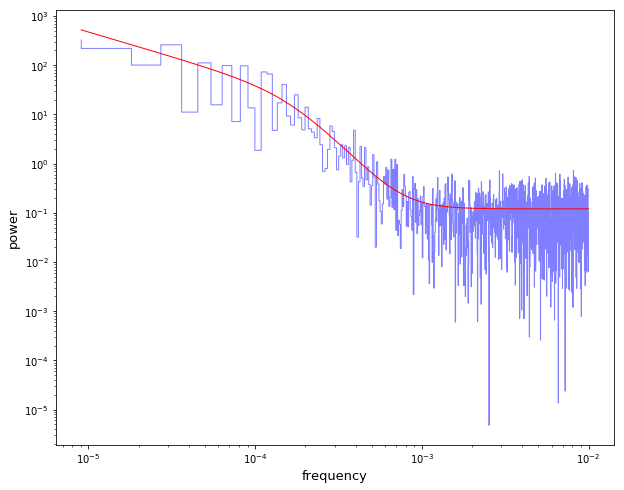

In [6]:
perdata06 = pd.read_csv("perlist06.csv")
f = perdata06['f']
per = perdata06['per']

alpha_L = 1.0
A,f_b,alpha_H,poisson = m.values[0],m.values[1],m.values[2],m.values[3]

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [7]:
# 均匀先验

def lnprior(theta):
    A,f_b,alpha_H,poisson = theta
    alpha_L = 1.0
    if 0.001 < A < 0.1 and 1.0E-4 < f_b < 1.0E-3 and 2.0 < alpha_H < 5.0 and 0.0 < poisson < 1.0:
        return 0.0
    return -np.inf

# 后验概率？

def lnprob(theta):
    A,f_b,alpha_H,poisson = theta
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return (lp - 0.5* twi_minus_loglikelihood(A,f_b,alpha_H,poisson))

In [8]:
# emcee

ndim, nwalkers = 4, 100
pos = [[m.values[0],m.values[1],m.values[2],m.values[3]] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
sampler.run_mcmc(pos, 500)

-1822.1014682503533
-1856.5501270920122
-1909.336300485094
-1782.75944145265
-1902.013795081112
-1867.7615040615524
-1901.0344847350316
-1912.5517662489635
-1912.2353509466686
-1879.7148355372904
-1913.0711839396672
-1903.8560370425787
-1833.3628749929003
-1843.2379473467079
-1908.153011314207
-1901.1143778012547
-1902.0708440758244
-1778.1425898870923
-1791.2182219506415
-1889.5363879117363
-1854.1463553744668
-1850.3795584408817
-1744.4712143401653
-1843.2822275280416
-1911.8024126550342
-1862.6232932454575
-1898.9097409945477
-1905.4417513262886
-1892.6063190623531
-1867.9684754958498
-1898.6402157044054
-1889.0162891421749
-1890.0867427103783
-1908.184496487713
-1888.8763173061793
-1912.4861358689002
-1885.001749521226
-1886.9676357981177
-1884.4753585046283
-1898.7927680258472
-1911.8547131105438
-1903.1723904251915
-1896.52686888039
-1838.0024989032634
-1817.66223112931
-1823.3050497922725
-1787.0688445856533
-1905.4056264084834
-1898.8994438443146
-1902.6306067271103
-1912.88861

F:\Anaconda\lib\site-packages\emcee\ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
F:\Anaconda\lib\site-packages\emcee\ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


-1904.7934749278886
-1777.128310304571
-1727.0630691907131
-1899.0004796716335
-1810.2614158096792
-1912.5060978665902
-1911.8624933488127
-1885.2509897379664
-1908.961737198244
-1909.9250919920166
-1848.3273024832079
-1824.4705584492142
-1862.270274088987
-1611.524780972886
-1904.1545490375408
-1844.5750226892496
-1901.11527248134
-1887.0086048329474
-1912.138288856691
-1893.0227258177504
-1871.8582205210114
-1835.1859214431668
-1913.0550831609949
-1886.3642065777333
-1910.300088033672
-1913.0029051113636
-1840.5951062271074
-1865.6790337589098
-1870.4961754735004
-1880.6786998265313
-1910.4104913231618
-1575.7011968961451
-1905.6011864595682
-1912.8862423090295
-1874.8804203156672
-1840.7780881113251
-1888.6053366635515
-1902.9079835512405
-1912.757990205801
-1678.757327106536
-1902.0224510170763
-1908.9700605162432
-1696.5608299339215
-1907.2482590932962
-1808.5748343620862
-1895.179607987888
-1912.6587883629127
-1908.1696555335013
-1881.6900380417146
-1913.0723078247047
-1912.56407

-1909.3890820443157
-1846.0226056227161
-1912.7777507410026
-1820.1485736680072
-1904.8864485140896
-1908.785316593825
-1847.8213596947758
-1892.2998669305198
-1892.3232512641712
-1910.7865246214728
-1913.0577511990425
-1910.2415045322998
-1911.7659820305119
-1895.3232247719814
-1913.078119837133
-1909.8975947246186
-1910.808940284309
-1913.004844168525
-1912.7465493943569
-1912.5751825516952
-1896.2410162774054
-1884.82573064453
-1904.3940335097234
-1813.8318451243913
-1908.2241549734952
-1906.9567498861347
-1911.6367710020118
-1847.4626816048315
-1912.9805292487338
-1895.1467187781584
-1908.8590595068897
-1845.481217450523
-1912.7383721257631
-1893.9717874789656
-1912.484253325046
-1912.4332507429456
-1892.5042345626289
-1856.4363158530061
-1829.5170063908745
-1910.1284373098688
-1895.7517151584075
-1888.2816782553778
-1902.2373275582277
-1909.1177689711226
-1910.3800324967297
-1884.616692141128
-1907.8610378616806
-1901.872537093739
-1911.9650446314552
-1911.2442563390146
-1897.8409

-1908.2774096580706
-1912.3952507748925
-1870.309237886909
-1904.4815360730265
-1909.2583623297749
-1797.4423844990517
-1904.888787365705
-1911.7111249774518
-1873.9029516674539
-1905.344221612232
-1890.3756250479605
-1886.5390975895396
-1911.3782577019124
-1904.2077593071456
-1893.0348634279217
-1912.830215343553
-1906.4642210636719
-1909.679674268852
-1905.772035995966
-1877.0406846573655
-1907.5219356428615
-1912.0830423682455
-1912.5554311597764
-1912.489098262414
-1903.9959641875196
-1899.6508465282004
-1909.7460998686036
-1911.3926994999688
-1909.3548308087163
-1913.014175251029
-1912.233810089669
-1912.961986707895
-1912.9322814516654
-1911.1706755632058
-1908.7787057063142
-1911.982373397414
-1901.8955753639314
-1912.1225833526178
-1911.6146793486346
-1912.4930835251803
-1903.7433485427784
-1909.5957993832014
-1895.620199918443
-1899.6623805235806
-1855.1589851701488
-1849.9305828989507
-1894.4151411373748
-1904.927982309336
-1912.8042640203926
-1904.6525858174236
-1910.1177673

-1884.3717535837775
-1911.17089598099
-1905.2556941645064
-1912.9406628979054
-1906.4448874231782
-1909.519915927695
-1912.7584519990075
-1894.4012775355282
-1913.054049840026
-1911.0469796828386
-1907.337984410582
-1912.7704758942832
-1902.0033932675483
-1908.6760752201753
-1901.8111992210333
-1903.8192651548247
-1901.95363167873
-1911.9007173416016
-1911.2075682864372
-1902.157054697723
-1909.8752640594998
-1910.2802485649097
-1909.6326024669745
-1908.329623311427
-1910.579852627723
-1879.4118469104162
-1889.7682713432168
-1911.3541299818112
-1910.7914828998244
-1907.7275316479956
-1911.5471213760236
-1890.3647448188683
-1911.6195068769468
-1846.526918269569
-1873.9528124419971
-1912.3146511304944
-1912.0734093501708
-1889.1052908646288
-1909.5169979267137
-1910.4959110040609
-1908.3996241372818
-1894.5895383804366
-1912.0636520614999
-1912.8760386925333
-1911.1159967523884
-1912.8683999984057
-1911.2058782970644
-1891.335015209912
-1908.8319642702306
-1913.0696144093447
-1910.745673

-1891.9592027713923
-1911.8730639315786
-1913.036095942722
-1908.5823560199697
-1912.679672277054
-1912.9518694578917
-1874.821443332961
-1869.7858229392853
-1911.3811896268492
-1912.435496738427
-1895.527872441583
-1912.8109501608558
-1913.0443475744364
-1891.619532242018
-1900.56607614217
-1912.137336295403
-1908.0906087918402
-1911.7003061875016
-1812.864852517613
-1902.186000504131
-1875.6005874462992
-1912.4957740238056
-1911.290505076432
-1904.964812238274
-1911.6525326952485
-1912.9742129805445
-1912.8830527106952
-1911.6872974685164
-1912.7020870113095
-1911.456084446277
-1908.489524352816
-1886.3779789836044
-1867.9085954399422
-1911.5375980349015
-1900.0353885582126
-1912.3936243166584
-1910.702582465538
-1912.6067942368304
-1912.224712330746
-1909.9203261859482
-1911.6168983921093
-1869.8210817732747
-1912.6120509960463
-1908.6373457043776
-1911.909359043344
-1912.7893635238001
-1827.1820359576666
-1909.117502186269
-1899.1311596865505
-1912.9815819744608
-1908.8656942292253

-1910.7001249340892
-1912.7881203950383
-1912.7705005608507
-1906.00093278302
-1912.7142546913883
-1912.9173368866313
-1911.7020941834735
-1906.5961183455727
-1912.1455743165423
-1906.4118202750603
-1910.8684632221727
-1911.9166550268576
-1912.3786719415039
-1911.4257722222872
-1895.8357868013786
-1904.6211133605268
-1907.750770411892
-1912.1416039438716
-1908.5643003216621
-1911.7809515825631
-1909.2568557324778
-1897.0108440438776
-1912.7598443220127
-1912.8670524466027
-1911.2995173964339
-1910.843611841732
-1912.0802967909433
-1906.6846112655724
-1912.1097035255343
-1908.914981659064
-1909.3133719372054
-1910.3099214525628
-1911.6078146060704
-1911.4665673977977
-1911.0142964186475
-1899.8763104593281
-1912.733012771628
-1912.4002141222716
-1908.0538556375081
-1888.8300404864328
-1911.8528293539766
-1855.0996894592586
-1910.607744042977
-1912.9582984084348
-1912.0064112148755
-1904.0552898488056
-1912.2740754553458
-1911.1162449689937
-1898.3941217209888
-1878.4112631089283
-1904.8

-1900.4324786478282
-1902.0538695760154
-1910.1380610406245
-1904.1215165401823
-1911.8405409805807
-1910.5262854208918
-1912.5131490916133
-1910.580952557507
-1912.3911833178736
-1907.1021120778387
-1912.0650113494858
-1902.9170745591996
-1907.886248214764
-1912.935601108903
-1912.6987073102819
-1902.5547732378338
-1910.8651878924045
-1903.338552627722
-1910.7891249567122
-1904.3017841976457
-1743.2901572329345
-1912.3738542597264
-1910.263023180446
-1910.8937429526582
-1912.350898491063
-1909.703879590628
-1909.7269773642136
-1912.3330487451865
-1912.745724599621
-1911.6209526936414
-1909.363029139031
-1908.77128258331
-1909.002353699787
-1902.5842337011047
-1911.4912152864001
-1853.4743752049853
-1909.7345300725594
-1899.1812174626673
-1912.435907047371
-1911.5120099789528
-1904.5868247736807
-1910.486866096223
-1910.187389683928
-1912.2995471276633
-1904.6180424665536
-1910.1755385375918
-1744.3841238605141
-1894.7333882933895
-1909.167227483611
-1911.7555181565758
-1910.7114054867

-1867.8387769765727
-1910.8346683794878
-1912.5318393829525
-1911.5395649604004
-1912.1932439887194
-1909.3162100321376
-1899.7804322803013
-1911.9210282733172
-1910.8911659893602
-1907.6918575664122
-1887.6138491090173
-1908.7939532765395
-1910.590762462484
-1907.0636716726863
-1906.6537859609757
-1900.2375602319566
-1910.5009162249498
-1912.5203598241324
-1906.5127737210717
-1910.4565691322298
-1912.888436592374
-1910.6751205770427
-1907.119393003246
-1912.740521476776
-1907.582334853963
-1909.2014113333037
-1910.3597425202397
-1909.9329197118836
-1908.5889318980828
-1874.0574948461679
-1912.2334663842923
-1898.8619753892372
-1910.6973955946573
-1901.9742637118607
-1900.9538021934086
-1907.8675281317219
-1905.560353422698
-1901.7803018695802
-1844.250846533285
-1911.8888201545262
-1908.0002001472408
-1905.5595598423365
-1902.661568311989
-1902.1138721141474
-1896.5901595301518
-1907.2637793913727
-1881.3940000263478
-1910.6514979928659
-1909.5746596481313
-1905.689053809917
-1906.403

-1800.4556163523935
-1861.0972873767662
-1899.7240043289241
-1912.0183892584666
-1911.9986313907987
-1910.9708893833363
-1904.466857651975
-1906.886378996007
-1899.6705317293715
-1899.110174577821
-1910.8914291367132
-1909.5958049336493
-1849.393859426865
-1909.0193574483749
-1911.5722601010477
-1909.2777064612455
-1908.8416209871882
-1907.429540542898
-1900.474102924802
-1912.232763705812
-1910.4847805647787
-1909.93825143185
-1912.483921895671
-1909.8196104098097
-1904.1851978747197
-1910.3556219902719
-1911.265780343927
-1904.7023193942173
-1911.5930005196233
-1875.134147905744
-1860.7555788975135
-1911.8542269168108
-1909.837482058789
-1910.122052965845
-1912.195573115499
-1911.1844280584257
-1905.1852214724197
-1904.335866972021
-1912.0084772938424
-1911.3841803084908
-1894.894758240352
-1908.8283905732744
-1910.9624549067912
-1908.4365356919295
-1909.401736889398
-1911.8671970224132
-1908.7590979831002
-1900.06859413539
-1911.5168234593025
-1893.2114471151747
-1901.3219803128954


-1894.4573012951157
-1895.1891046173496
-1880.126140005988
-1895.8171596435775
-1895.88805203126
-1877.3357912591819
-1909.5221298707884
-1906.2488464770506
-1912.9860614093714
-1908.3171385831627
-1905.867477928865
-1911.433628349532
-1905.2475009004138
-1906.6413848889233
-1912.3114001716442
-1904.4911705812149
-1909.2152093610293
-1906.5167846586187
-1901.5867902730536
-1910.4936688182734
-1909.4286077464822
-1903.1354151454852
-1907.0655159043154
-1910.8242456253654
-1912.5348356410398
-1912.8263254198182
-1912.358266701167
-1900.668341413571
-1911.5250232530602
-1904.3116246288866
-1909.7869698208451
-1911.394141927914
-1895.633844781512
-1909.9926910616855
-1910.064340478269
-1871.637178735141
-1903.0462093692197
-1909.8383888226983
-1910.9766769380665
-1906.9773058487392
-1907.797817288452
-1909.3436734044378
-1902.0189682259193
-1906.8958587871668
-1909.7187425555176
-1911.7008864413162
-1912.1618034871867
-1909.2353319410336
-1912.779069221655
-1905.6921862376578
-1907.7182981

-1912.378724056614
-1908.8082409116832
-1906.3302861685133
-1905.2103979000312
-1904.0366859893347
-1912.176450655075
-1909.72050961461
-1910.195212635969
-1911.601965910966
-1877.6344023091947
-1911.0583671486309
-1907.5513003496674
-1905.9728774147661
-1911.3683540981697
-1911.047329876068
-1912.081559793229
-1906.9488142171617
-1912.039727913676
-1889.4174929542612
-1909.3743119657256
-1912.381632737847
-1912.6504195744337
-1912.4884685737181
-1912.3050119186867
-1910.9819705311832
-1912.5737057202928
-1912.1770539189201
-1911.8997515718238
-1909.7043736544451
-1909.170094921959
-1908.628492648769
-1911.4836882846432
-1911.3663154774217
-1906.1223106992331
-1910.5719569240437
-1911.6845391281745
-1910.9592959324564
-1905.7397563696961
-1908.9405998873895
-1902.0636421284103
-1911.1776978400508
-1901.1033886773537
-1911.4556210448545
-1904.4016550758154
-1911.825597224641
-1912.2994792349036
-1912.097598194135
-1911.0153648028204
-1912.2588758290256
-1909.5223761377274
-1908.64789271

-1911.1494761188872
-1906.381690470926
-1909.473615333769
-1909.5420564462258
-1911.5549374717093
-1909.8171906257937
-1912.6609182139239
-1909.9009738981713
-1910.262324613224
-1909.147210416124
-1910.046457434953
-1912.81746181405
-1907.614819905416
-1904.4693036009908
-1907.645094037977
-1901.3072541012045
-1909.304162493609
-1911.3487129935233
-1901.4356969027008
-1909.3963267248132
-1909.2212542036646
-1909.2800732567018
-1903.8908081281952
-1899.982645886564
-1910.741318419874
-1901.9974487490276
-1912.0962358627191
-1898.105054406952
-1911.5826690079641
-1910.981897705651
-1900.273958504473
-1911.084569712451
-1911.2882088165582
-1909.3478075031064
-1909.910017319714
-1900.4612531754096
-1905.4533678407975
-1912.0816942607532
-1903.2746942949514
-1912.7569688464055
-1911.8155620488646
-1911.072015231312
-1907.8641861394303
-1903.0920812858426
-1910.2699906026278
-1912.4530030269395
-1908.2645200002605
-1909.9702500571059
-1910.3808168449143
-1910.9884563200717
-1911.623045938004

-1913.057654218753
-1909.4609746404692
-1901.1892374542683
-1906.3948237488821
-1895.2283637224893
-1909.51580807351
-1912.1822495545548
-1906.2350680457967
-1901.032012215405
-1908.1179189898737
-1906.0340798673474
-1912.1186623716567
-1910.0995048286838
-1908.0482823179173
-1911.8779821193416
-1911.3794645780254
-1904.0459477020001
-1911.7026196539048
-1905.1390707759954
-1908.5946630691612
-1898.5492215750085
-1909.581512211699
-1899.7454048881277
-1912.2315571419163
-1908.4271808699987
-1906.5991613655378
-1907.633805931351
-1906.4285318413383
-1911.0548320986659
-1907.967301692357
-1912.4774072459988
-1903.6093276995412
-1910.7069160161993
-1912.8182115031177
-1910.0594705133446
-1909.2568759146093
-1911.3577034287139
-1908.0905061728622
-1911.5244512950128
-1911.8806569349103
-1912.51257771451
-1909.0922531846882
-1911.1914465689047
-1911.628752866189
-1906.4800744978565
-1911.5889041481632
-1912.4344102338102
-1907.4889680552587
-1855.4383470081802
-1911.7692621609258
-1911.9455

-1907.320785357189
-1885.863037976802
-1910.593034211357
-1903.7441758808177
-1899.3641652344463
-1911.2796543877848
-1909.4443383124542
-1908.6057294907453
-1904.7300765450555
-1904.7526884687757
-1905.4354295198825
-1873.7400282586318
-1912.7285592864653
-1907.6026816003275
-1912.4611723003657
-1884.6704148867461
-1912.0356862836563
-1909.6934066580961
-1910.5722101280423
-1912.1793801805154
-1910.0881804718047
-1911.8560033418207
-1907.8455373958939
-1909.34893591206
-1910.2227652417446
-1910.7697273263773
-1905.9955158094454
-1910.4731492305743
-1910.2565816862914
-1902.9190546051823
-1912.4592301783653
-1910.8643672617764
-1906.9614239279874
-1911.5641432777572
-1912.8556271473126
-1911.419604982146
-1908.487688263834
-1911.802284016205
-1911.4393065743702
-1912.7818103000131
-1875.1200097002945
-1911.2475859073033
-1906.9809535302227
-1908.3747462211202
-1909.0501361926335
-1904.6868537940427
-1910.6349650204236
-1909.7404614436116
-1910.167986613406
-1905.5081201046025
-1901.684

-1911.7465319221403
-1910.8095218369251
-1910.1683343616025
-1902.0631567520038
-1904.67879246966
-1908.9772541869308
-1911.3179814301443
-1909.941844740915
-1911.2631096556363
-1912.2352071847133
-1912.2739164479551
-1901.9625972041645
-1852.9995120409983
-1909.4055712424656
-1910.7556769234827
-1898.0999811542874
-1908.1362514592847
-1912.5802444545118
-1902.8489614381078
-1909.7753646783947
-1911.2973354577907
-1910.001975465205
-1896.251397242278
-1842.5688528031008
-1870.9801069869882
-1889.567405559883
-1906.3802341704995
-1909.044226162585
-1912.128722946783
-1902.8321083488565
-1905.7851794345565
-1901.5741716626735
-1910.8510306255225
-1905.0133320374664
-1900.8898830963308
-1911.8249438985888
-1906.0460877897403
-1904.6793622801824
-1908.78758407938
-1909.0852181493544
-1908.34568128498
-1908.183218580401
-1910.0481893836113
-1895.9162287843283
-1908.7043477485356
-1911.7181092045519
-1902.573174745059
-1895.3983478827345
-1902.4194339878723
-1909.401778191035
-1906.108558259

-1909.3692251877965
-1908.569819625379
-1897.5223965351247
-1901.107859117179
-1882.4416936494517
-1896.6296866873054
-1912.1990309559405
-1912.9645588699336
-1907.3027001760522
-1908.8571958084667
-1837.4113403641907
-1909.6055272686651
-1905.6555697400343
-1909.4987115906458
-1900.8395169448531
-1899.0950215044973
-1906.0395284565527
-1861.074467160146
-1912.6321993186032
-1859.8209681329872
-1908.5217411204712
-1910.91034370178
-1912.6788584738122
-1908.2485122810012
-1910.4520351530189
-1907.9005343581148
-1912.4980574804933
-1851.543789364083
-1903.3053506111944
-1906.1225499134332
-1910.9160927054322
-1909.0766153470288
-1905.5922985428058
-1909.4820754371735
-1912.9740278972886
-1909.0348642731608
-1806.250798572307
-1907.6701367180358
-1862.6457804343759
-1902.8526210010066
-1913.0113733524543
-1908.3633596025659
-1908.7929077388294
-1902.4036424760839
-1907.7713816710232
-1912.0562421936652
-1910.086309953877
-1901.5540673526248
-1881.5260382643069
-1912.68989915882
-1911.8263

-1910.8142509715046
-1910.5307193174508
-1901.186629250285
-1910.6909160093014
-1903.4872658913384
-1908.400931255044
-1910.9919297351173
-1911.8797528727148
-1910.0046370184164
-1903.0906703819412
-1906.9537384000225
-1909.472621917125
-1907.483093619067
-1910.5441013925492
-1907.071798279847
-1912.7145176801878
-1898.1414114566637
-1893.6837716038704
-1909.592295415921
-1888.1999155814576
-1909.8517066263648
-1903.8624011043548
-1912.8035133293813
-1909.3049838347206
-1910.5358267336114
-1907.0453950939016
-1900.476358186631
-1885.5391585872592
-1896.5413089530712
-1906.80539034987
-1907.6148980139242
-1910.8894740867847
-1873.4437678381282
-1912.6361073363466
-1908.3198286422414
-1863.8673685543145
-1912.649005898863
-1909.4797622258836
-1906.9353155445624
-1910.4560028592246
-1908.7674458333258
-1903.232693264522
-1906.251757423068
-1908.438961214152
-1909.3477201612877
-1898.019760512656
-1907.9934109185112
-1912.0263365874373
-1911.7040774645734
-1911.7379507981482
-1906.00013650

-1906.0568345859836
-1904.6329710588957
-1912.6137990371287
-1911.2834892142332
-1911.8862782474798
-1895.2609180335082
-1911.1812087282883
-1907.1636304514277
-1911.9334159189007
-1906.8100157527056
-1911.8430813146883
-1908.6340835728245
-1911.5340355963297
-1911.137539840452
-1912.799966424572
-1910.327190901847
-1901.2154460767936
-1911.1458720671083
-1909.4426917010933
-1905.4814862498383
-1912.1679661821124
-1912.6073217813237
-1908.973499637343
-1898.5717389953923
-1912.7413519873626
-1910.6810974695445
-1911.823842161238
-1910.8297005672912
-1912.988397572062
-1911.7494591011673
-1876.2926934854795
-1912.4270781015512
-1910.976984538431
-1908.0213762200679
-1910.8251398759164
-1911.9747763205437
-1911.6258302815575
-1907.1623025981241
-1911.496728506775
-1908.5015655628445
-1909.9629467108039
-1906.0463886285775
-1907.7812114985766
-1911.827290572849
-1902.042810100608
-1909.5731637925949
-1910.6330490696369
-1678.3717568764557
-1909.3846890279435
-1896.8286398551313
-1910.7768

-1909.938268782055
-1910.792054204091
-1907.5051922824423
-1906.3223790050952
-1912.9075432054185
-1900.0181297830284
-1906.980508331073
-1896.7725125767752
-1912.8076854390642
-1908.3334876841834
-1909.3141984729034
-1911.0788571621288
-1904.868639090345
-1902.9018782615706
-1908.7194448255473
-1909.1961766191669
-1910.654008895021
-1909.7307917422222
-1912.0878511849407
-1909.6380792763434
-1906.9445939771128
-1911.090674856845
-1911.4452853476807
-1903.8030057433105
-1898.3784310667934
-1812.8943995730865
-1906.3152718486551
-1903.0750051675973
-1906.706410684291
-1911.40319758298
-1902.2834904123768
-1910.1481720196132
-1910.7027712102492
-1904.7303673483063
-1904.8360989897049
-1900.2279103298713
-1903.5647847790035
-1900.8984026290882
-1900.831727265689
-1908.3235891268407
-1912.3909708882902
-1909.073525385323
-1895.7428096845588
-1912.1955132856626
-1908.0994060910898
-1905.330392168115
-1912.5435301487073
-1887.9973345658998
-1912.2518073629503
-1906.2514544025228
-1912.595961

-1909.227941944642
-1905.0147034903111
-1910.375727590524
-1882.410167807874
-1908.1598206914748
-1912.5494691022298
-1911.5549999507202
-1877.1308814697757
-1906.8478333204753
-1912.335808126614
-1900.623264142772
-1900.691874475199
-1857.6475039292136
-1896.6413553932211
-1912.3213739816708
-1906.4092023049948
-1912.460902887156
-1912.8713974827194
-1904.2982782939819
-1905.354367982992
-1909.9745714036965
-1908.8146726660293
-1909.016576694163
-1912.7760111573116
-1907.3751725638153
-1901.7433062278412
-1910.1215787870256
-1910.5665737409267
-1907.0257108506337
-1908.1008281321997
-1900.4683994267161
-1906.498265653565
-1911.48902533299
-1905.5399949172672
-1910.5974099977998
-1884.0014337002015
-1901.6151989630487
-1905.665340602142
-1912.0260726839133
-1906.902480582313
-1910.6154099235412
-1906.6253061781206
-1905.9516669096
-1905.3364891507633
-1909.9613366255662
-1910.8371196381624
-1906.8812457570534
-1911.7978376626388
-1910.375940896185
-1910.5130467274168
-1907.586050457626

-1900.1686053148928
-1912.1828967285458
-1910.0899075907298
-1910.7483885410256
-1903.238906484947
-1885.0215207794133
-1909.539858753073
-1911.0470526866018
-1911.4715648318495
-1910.9990506753152
-1893.5089303505924
-1898.4565655764206
-1904.9154593147953
-1909.8760044890512
-1910.2294713094054
-1912.7045428702634
-1907.8099084741386
-1902.7752637234055
-1911.5200439511855
-1909.374025710501
-1909.8232031804644
-1909.4161593067845
-1910.6834488018526
-1909.7401878241828
-1908.9596999755383
-1906.0628577197128
-1912.7868433609767
-1912.1491579036929
-1911.1911183440432
-1904.053284775549
-1911.3562117605723
-1912.468505569717
-1905.3850995055518
-1911.4117011392723
-1905.039482730115
-1910.2112022848748
-1905.0029975689827
-1909.9808974176779
-1912.5598289456732
-1900.5971529903347
-1911.209234076319
-1910.3724252984564
-1909.6951317447342
-1910.2155605216537
-1909.408183373128
-1910.4040451933352
-1777.5285422955073
-1908.73457942347
-1911.7107891660348
-1905.5180701479524
-1911.5114

-1895.419120328955
-1900.2288543810087
-1910.7138535421532
-1909.2201977192312
-1912.6865352809002
-1901.7243523887878
-1910.3627612478115
-1912.1827018786623
-1904.4985021660762
-1891.816536055352
-1900.272236933852
-1910.042950955413
-1908.007110549552
-1911.604793009835
-1909.8504636408234
-1880.1508725689532
-1900.837433762575
-1908.6561238877853
-1907.0116542491096
-1906.6464610837713
-1911.1046591143959
-1893.9184614059518
-1906.0176411025336
-1895.630188733769
-1878.812515222403
-1905.7755294189426
-1903.0959816017437
-1890.039734787863
-1908.3474162865157
-1907.975775549973
-1912.1367374501378
-1905.9790441380487
-1911.6391217442165
-1909.809996986701
-1907.5579706918377
-1873.7029366064203
-1892.7601926527657
-1904.9577434547398
-1912.6350730098063
-1905.4112811133941
-1908.2065614295752
-1896.817855207218
-1907.6442721927244
-1912.5054371416531
-1902.53387989607
-1911.6454246312594
-1912.2951100016064
-1912.5411018317022
-1906.6093765789005
-1911.7240068191743
-1910.151080293

-1912.0992845176359
-1912.0944754969796
-1909.8736371122286
-1887.6641101752305
-1909.5654705181419
-1910.7656268041214
-1911.9255635659795
-1905.926593247389
-1907.1577890147623
-1907.031075763775
-1911.3599096943021
-1891.282041583302
-1910.7349035576824
-1912.5120283034425
-1905.3717132211434
-1901.9511243629029
-1908.9027014359133
-1912.1663370161414
-1910.656992019219
-1909.8078414534425
-1910.1423904288397
-1908.128758232551
-1902.7378151881182
-1909.529981892156
-1910.6103469854127
-1907.6225798321832
-1912.033337734039
-1908.0271850731829
-1912.0527169685859
-1910.2619793316176
-1910.283857994766
-1909.457166885897
-1899.141868433767
-1907.5287488684207
-1912.7121923209786
-1908.6094438704743
-1912.2818476418033
-1911.3287312414109
-1910.8871362337366
-1911.1073200364008
-1907.897289709052
-1908.418811020699
-1906.2110237043069
-1878.6794448023309
-1911.0826879076803
-1903.9349352232023
-1899.014164493931
-1904.8859442853868
-1904.1171691807658
-1902.3034301906832
-1903.0228096

-1869.7353857726737
-1893.5892925247797
-1901.3221454784866
-1907.113983661964
-1888.1110925530977
-1870.504667627168
-1909.89019233598
-1907.5080041643596
-1910.5995081871308
-1908.021701642144
-1911.8435729831047
-1912.2047615938632
-1912.424319263228
-1912.355485825072
-1912.37298410782
-1905.0029365081261
-1910.504249437882
-1908.493580698974
-1912.7333324235562
-1909.0131579401211
-1856.3139786705742
-1911.758316059812
-1909.5084843188044
-1907.705037356801
-1908.930268527322
-1910.679596899484
-1912.2438911212294
-1912.049544864294
-1906.9856448243304
-1910.7657609059186
-1909.953553833715
-1911.427130898831
-1909.9109220763085
-1912.6175962617542
-1909.7556798977546
-1909.357820811719
-1908.99088852525
-1910.3707404050008
-1907.4149365125606
-1911.4486888033016
-1908.7660014701169
-1912.2273774978364
-1912.572970417355
-1903.0908174691604
-1905.3585591586002
-1909.378787934736
-1879.5497397208158
-1909.1627854732342
-1885.5822849807175
-1910.1558813783372
-1912.7793153065131
-19

-1907.2734913746244
-1908.0498625777784
-1907.5430122972698
-1908.4236543121685
-1896.505130023684
-1907.2764364141565
-1906.3731684729717
-1909.1682796869309
-1910.3736414860455
-1906.914994252837
-1881.1151827737065
-1911.9380014632388
-1910.8950457446253
-1909.049028234625
-1911.9622559879988
-1907.5196716655316
-1896.4378913680814
-1908.4834405571983
-1910.4847904104965
-1906.0979359190703
-1908.0787966817747
-1907.1261321689897
-1905.6849555119402
-1908.5166217316732
-1910.974566044046
-1909.029515138716
-1912.2550487586543
-1842.151506131713
-1907.5953843040286
-1909.2555751131617
-1912.0769868050227
-1906.2492875338467
-1912.0387390170965
-1908.836567117854
-1897.7181716165346
-1900.9661839578291
-1912.1534003141646
-1904.0884012893534
-1902.8043881705546
-1908.886642708259
-1912.3295288182437
-1912.5514117030516
-1882.3606271463802
-1911.2529878650078
-1909.3644880402799
-1911.874394353037
-1907.3036832929458
-1895.800643214148
-1900.8677453360315
-1902.6168223969737
-1908.3458

-1843.768176216477
-1897.907568301522
-1904.9841870395032
-1911.96801928453
-1905.998656800147
-1912.177212525088
-1906.295653718985
-1904.1335161338727
-1912.7604409564701
-1912.118517205459
-1910.0185050847754
-1907.1668462096768
-1893.6791223113114
-1896.0259954220626
-1910.5806852707215
-1911.1716260576397
-1909.7012274363822
-1910.151286233514
-1901.6257853877757
-1912.0582373713783
-1907.532685386909
-1906.474369041537
-1906.8009586206647
-1898.0946756492226
-1911.1727206607125
-1909.8275438609187
-1910.988412106809
-1910.7531417318537
-1910.143526621132
-1909.6557077451037
-1903.8661202670794
-1911.3124316394535
-1703.7014716027272
-1906.9985527089389
-1904.8700605724384
-1912.6024640483542
-1909.7291375484438
-1912.0765622114843
-1912.2569564687456
-1907.790860806972
-1908.9722871310637
-1850.399657731256
-1910.6643396343795
-1911.7118597952287
-1909.6841496169534
-1910.698411224446
-1911.4782674631165
-1790.1885634057826
-1908.3723570589066
-1895.6799503888215
-1806.2209942099

-1906.5015592401803
-1886.6483645089797
-1911.1499213391082
-1910.8221646460202
-1908.1071181787274
-1910.2017465043652
-1905.2691858063297
-1910.3678739263607
-1910.6288767937215
-1912.0106959011864
-1905.739933265674
-1908.229214669704
-1911.071180089566
-1909.9688727597481
-1909.0409293455918
-1912.6186442181904
-1900.101591539916
-1909.7985074059595
-1906.2657842207318
-1912.6016358178538
-1908.8916908737376
-1911.8859510114867
-1902.951319966448
-1911.6118971761414
-1909.5411821372104
-1908.8261161239789
-1911.270171974133
-1911.2432624965807
-1850.494092394725
-1882.5939154722191
-1911.380232887594
-1909.6718291197938
-1909.185653222376
-1910.837013504975
-1910.1433017318323
-1912.011980311865
-1911.0201105278516
-1908.9447150897522
-1903.0493538779226
-1909.4455761095364
-1904.1584082792288
-1912.717278894583
-1910.7817708477874
-1911.9275491418198
-1904.542820907134
-1911.1794161142275
-1909.9471353267745
-1911.0374828257454
-1899.3702977374812
-1910.6381974246513
-1890.2368180

-1909.0521965326743
-1906.2158702283464
-1907.6790351000125
-1909.2915549571073
-1908.7834409729812
-1903.9621999493245
-1902.7732648469087
-1909.9072296434983
-1911.6137909460206
-1910.554259719986
-1911.8519997435797
-1907.4358062771623
-1907.9713172913005
-1912.736672270315
-1911.0088649795775
-1911.1600618303519
-1912.0700232353188
-1910.8969899022172
-1911.0901235278905
-1909.093357323822
-1903.4675663651544
-1910.1024133593373
-1908.6360926413615
-1781.9431365468533
-1910.475066320497
-1911.2113783503305
-1909.570276770824
-1912.545036266493
-1899.8828958219199
-1900.0560735865154
-1868.3800348296247
-1907.3509091196415
-1910.6077901135304
-1900.2390097864375
-1899.5800714297866
-1912.5924246306845
-1893.288472877723
-1911.167185675428
-1907.9794979698327
-1905.7249048269027
-1897.8518182525163
-1910.6443505021748
-1894.1080203707365
-1912.2273453162497
-1911.0431592300329
-1909.7434654790586
-1907.6316361834452
-1912.2765558408785
-1911.229955450783
-1909.6688824405362
-1911.537

-1911.6194540167262
-1906.094631361993
-1877.6538635347051
-1907.341238321983
-1912.6071737587974
-1910.2982120037652
-1906.6133321746154
-1909.4763050835527
-1899.6074497111263
-1910.6226201093405
-1906.5337665675527
-1905.6191465390302
-1912.348502513187
-1909.2139479326067
-1912.192514842589
-1910.5148149855206
-1912.0531535722373
-1908.7089174728908
-1887.6745164418178
-1912.1349744539284
-1906.5873648787383
-1908.5771724644555
-1910.1794333045436
-1909.714632125046
-1863.9298849646386
-1900.7530033305131
-1909.2341811163178
-1898.5129917429626
-1909.8502721938053
-1910.227661578319
-1911.1126140328445
-1909.3258872117535
-1912.1934435769713
-1905.0365885896877
-1903.067920092477
-1904.3259075241995
-1907.907372424679
-1907.3543497131886
-1911.3408267204154
-1910.7953787436436
-1902.8261083255595
-1911.7744472007428
-1905.8534954077807
-1889.1173570905228
-1803.0198328553467
-1906.6174563867698
-1904.587945515762
-1897.2198966403646
-1912.2053562340952
-1909.5031429863573
-1893.891

-1910.8388989611192
-1901.7232545487075
-1911.34459398481
-1909.2393317320416
-1902.923319571385
-1912.0978393120215
-1911.691853955851
-1911.573120937561
-1910.3006613724176
-1910.094991714276
-1910.880604345899
-1910.0682869966693
-1904.5743896640688
-1908.9289194659762
-1912.2031494438602
-1908.48097856605
-1897.146982242154
-1909.5846233925643
-1909.2406686455668
-1905.8218502855793
-1906.904211275717
-1906.4660868617088
-1908.0575027403804
-1901.124043583177
-1909.6263096373261
-1911.4705905072603
-1903.9057391765907
-1910.4134081857537
-1901.8951790617953
-1907.5444628738721
-1909.4488891685176
-1909.7209773722934
-1909.4789942867476
-1861.6423585226958
-1902.7112936126975
-1906.7450516712665
-1910.705061192923
-1907.3890529435373
-1909.2791316035764
-1911.1155837949057
-1875.4229164710814
-1910.6998675687685
-1911.1618767091468
-1902.5336962517208
-1881.0645580240473
-1908.0811009401154
-1899.6574106715561
-1910.7599824809859
-1894.584666988897
-1911.9697642868366
-1909.19692175

-1904.0432513128942
-1905.3231999711109
-1905.4208588991703
-1909.7882277367196
-1905.1023916376685
-1906.0801917247743
-1912.5582808785987
-1909.987220562341
-1902.3464343052694
-1904.2930832789905
-1908.6453813744472
-1910.2782340548522
-1876.1738077862974
-1909.5940839003733
-1912.179953874392
-1908.6382700546521
-1911.8052571838837
-1909.991141603172
-1910.3622774650314
-1910.6575481391587
-1910.6059367784421
-1908.8991049984818
-1909.4494658444437
-1912.698363617162
-1909.9477079305652
-1910.9592465633702
-1907.9959561674027
-1904.4533372292606
-1902.3496078190803
-1908.14331308962
-1911.890014776393
-1910.4711903645364
-1906.2727742439095
-1904.0164732774513
-1881.1278709693659
-1909.044996788996
-1911.0910495282958
-1907.393509359071
-1905.7673436482378
-1910.352541913974
-1907.0349163177598
-1912.9777768720292
-1901.906059469955
-1903.8394198859958
-1909.1336047793627
-1906.8605687552274
-1900.4348444605723
-1910.7718103429816
-1908.852697480916
-1831.5623313452952
-1909.912210

-1908.9844240714142
-1906.0234262383788
-1909.4043175108618
-1906.511354459356
-1912.8185691160695
-1910.5354682275959
-1896.9936236525834
-1910.454021803741
-1912.399404828415
-1900.915711724178
-1907.0372250185342
-1908.6732029687907
-1899.257743224047
-1902.233434939335
-1912.383041186408
-1910.5838731519132
-1910.3378502989178
-1912.4682804075603
-1906.9468394720602
-1910.0962842825413
-1902.1856841102324
-1908.50761021123
-1911.202745148707
-1911.6184377564086
-1909.0672695657217
-1897.148729836616
-1902.3463936403318
-1911.7131639215054
-1908.4467648400275
-1907.0055092448329
-1904.4763574138462
-1908.1916903618433
-1909.2429277730002
-1908.7222555541755
-1909.6122894174794
-1909.3684677414421
-1909.685808625274
-1905.1092082979408
-1847.510139230788
-1909.8220080408505
-1911.4015612012229
-1910.9246920813066
-1905.5496843729618
-1908.2379420153136
-1910.863685709466
-1910.0825124589726
-1911.3666841969275
-1907.5929353581132
-1896.3229642008305
-1911.7503231861429
-1912.36367227

-1908.5179031991802
-1912.2367600510022
-1890.245494296676
-1879.7771704574097
-1910.6043240683787
-1911.4589702515148
-1909.4567153658124
-1906.0274032035552
-1912.7431039029268
-1905.5655997794488
-1909.5373586522367
-1904.6150220436086
-1909.2263211542568
-1904.4660265117038
-1909.95586747181
-1894.4384657541102
-1902.2904085565815
-1907.9757156788842
-1911.2467992399907
-1908.5832833287354
-1910.9291131071338
-1908.8670938184673
-1911.1814003565582
-1899.5062171747065
-1910.307730310604
-1903.5700658223946
-1911.629080036567
-1909.5087648709475
-1907.493703577816
-1911.3389158610203
-1910.3022246314963
-1907.5288417360841
-1906.1560017388522
-1910.0858925045845
-1907.224790662588
-1911.445876312503
-1906.9180080724343
-1910.2202651756418
-1912.8767299113258
-1905.0436386831293
-1894.1519496032709
-1910.8578338610419
-1909.213520651263
-1898.8488937788659
-1904.0758561469347
-1901.715557370392
-1911.9837308648646
-1912.4474572141805
-1900.9359264158754
-1891.5113199247346
-1909.0777

-1910.4765165107744
-1912.0992640709876
-1904.678751779233
-1892.790862263775
-1884.5161509127952
-1911.9027424387307
-1879.4068416026178
-1906.6453628970621
-1910.479662900582
-1910.3820374120808
-1911.2889586941844
-1911.790752149276
-1912.2099183311495
-1909.70636619744
-1680.3841485668095
-1910.3385329558525
-1903.9440501914244
-1908.9728132706912
-1895.5765638343275
-1907.2930432400487
-1897.4590218351104
-1911.2670778779227
-1903.2893523664673
-1910.6044498629885
-1908.186868629414
-1911.5005885037735
-1900.8782059367338
-1892.959416295952
-1877.6560094224158
-1903.2683910016142
-1912.808343780019
-1908.1512620000708
-1907.0982176295493
-1908.5615216231301
-1908.3621958875515
-1902.3685317593909
-1904.5913198354974
-1907.573376533015
-1910.7629518051688
-1892.844584226993
-1904.469307109043
-1909.7454072513394
-1890.0740121556312
-1906.2481102783831
-1910.3351616426385
-1907.1860501870037
-1909.7005469823591
-1904.3561645652787
-1912.215859022054
-1911.801008294952
-1909.28366199

-1912.6356542460337
-1909.933943962029
-1911.970662293662
-1911.4608087857007
-1904.1440504245115
-1906.507073015303
-1906.3290324706195
-1907.8032447087044
-1902.183781352127
-1909.104357635752
-1903.219222507773
-1899.4553497981558
-1907.1237440084542
-1910.0484628913807
-1912.0952169683503
-1907.8465901603508
-1912.2689611146563
-1909.306871783123
-1900.449880058858
-1912.2889167269764
-1909.2944616018037
-1906.6058110362649
-1910.591253949487
-1911.0831411312759
-1906.7459287989386
-1909.3408900627098
-1893.8879354413402
-1910.9056268289535
-1912.4104219415333
-1910.2254504426069
-1909.1794929799823
-1910.4291994134583
-1911.901688267442
-1910.297708515014
-1904.4259801041846
-1912.6681409627822
-1909.6934638975497
-1911.4361533659614
-1912.258991006626
-1909.996970727464
-1898.664137633358
-1911.5016512594223
-1910.2556107468133
-1909.1168793384172
-1907.2513769024058
-1905.4446043022633
-1909.4652452134887
-1912.244132002953
-1907.8146495386472
-1911.0213516356898
-1908.819445480

-1906.6615735184298
-1912.9361623126604
-1909.4854729296956
-1908.7278573349386
-1912.0025877734304
-1909.7344667488726
-1867.2237489128274
-1911.0356508035773
-1886.748773008557
-1912.1482819836688
-1908.651038273924
-1911.551259550496
-1912.0072817514506
-1911.0904673108842
-1906.7148724026422
-1899.828974345438
-1912.1752637678212
-1905.61632909815
-1908.331965955055
-1910.2046506875931
-1912.155053560655
-1911.7602980714755
-1901.7196359974919
-1906.2578353480271
-1912.7439684336514
-1901.081802934634
-1912.561260987061
-1912.34141779462
-1904.3839275722394
-1903.7722439969843
-1911.8862068740439
-1908.6378363158751
-1903.8945688667307
-1904.7334306632818
-1909.543852758053
-1900.3527216605007
-1910.2819328443898
-1908.0647415902088
-1907.6360920978245
-1909.7425668444369
-1907.3595232774012
-1909.5075640883786
-1906.4940548470574
-1901.5052367562325
-1912.5281011076647
-1909.3450470330222
-1888.6372723708746
-1904.6654815990846
-1700.3762106264057
-1892.514788866659
-1911.69711104

-1911.5181567237362
-1906.8256985327585
-1908.4047293196172
-1906.6072749487746
-1910.7724347897831
-1908.7528873581243
-1908.8391999700198
-1878.7375162278597
-1903.1099648324378
-1909.342838340813
-1910.6075531239503
-1898.673533424751
-1902.3321208444418
-1897.6492408932659
-1910.5532924352378
-1905.881503916083
-1909.8201427070203
-1906.112010409341
-1912.2450099755663
-1902.5332201563192
-1911.3019788985014
-1911.534389450339
-1910.0705868623581
-1908.4960015910265
-1911.5844173653081
-1907.717208574869
-1908.8346593028054
-1909.2400685950638
-1910.9821880169793
-1910.6525968130427
-1899.0605534748497
-1910.334839725485
-1907.4436355822772
-1895.2589203847103
-1911.017810833437
-1868.1309605153372
-1912.0181367259372
-1910.5726050267149
-1909.9048782750267
-1870.5886229420696
-1910.5179861858983
-1910.383349162584
-1911.690205836621
-1909.5559951912842
-1906.4694604136296
-1910.8445976942196
-1903.540040114014
-1902.66726484555
-1908.5717778911292
-1871.9250371596856
-1912.3387174

-1911.4636678095012
-1893.7681726679828
-1904.107181960624
-1870.2643096533263
-1911.37820101411
-1912.2202837396185
-1911.2179546671584
-1906.3957154491095
-1911.3280941825865
-1911.3895537378821
-1900.0903317943114
-1910.931463905766
-1910.5004363094338
-1791.5891876620283
-1912.6502237501782
-1912.1248070350696
-1807.7599970556246
-1910.1714754684679
-1905.6234853581789
-1910.7509001034775
-1912.423472312339
-1907.685651617353
-1909.8321734216292
-1885.1584706615627
-1910.244855953914
-1912.2506109403027
-1909.6970193939705
-1873.1207735978596
-1911.6170723624468
-1907.857415646506
-1910.867520260101
-1906.9156050799604
-1912.2190465035403
-1900.4094963152174
-1911.7265810152762
-1909.985161813196
-1910.822853218011
-1910.1066016387285
-1911.356567862768
-1908.4633326790806
-1904.6961887059379
-1911.7720213726618
-1908.610125807607
-1909.1559513035465
-1910.5456421288477
-1907.9248992646983
-1908.790111783267
-1909.9412039793704
-1912.5914711084306
-1898.5776222333034
-1911.61434176

-1912.2519038004154
-1910.7637771275995
-1907.4949465836683
-1910.3137085239775
-1895.6142916939805
-1909.195868600134
-1908.4695388350808
-1904.313981856899
-1906.1109943816366
-1905.4884966968
-1909.5000793512445
-1911.8876987422607
-1906.6443946643417
-1877.8374848347396
-1906.9394966397056
-1907.2710707497874
-1911.6948008121917
-1909.766731043581
-1904.5074018556684
-1900.7813750678743
-1911.4742289390595
-1908.0987025120241
-1912.5970442159835
-1911.659200558686
-1910.9703373236532
-1912.8250093162137
-1910.212208619822
-1907.6237330586348
-1909.7439109981112
-1887.428027871076
-1906.7250478471653
-1912.4534765455492
-1912.181746017188
-1909.267112398298
-1906.2665792495745
-1839.7283421318468
-1900.5911911439387
-1910.4283842342047
-1907.6907281869449
-1908.0787344115906
-1909.033651642441
-1909.4437542594324
-1912.6002883096326
-1896.9418316282802
-1909.7340274402695
-1907.3537980455335
-1908.4587167203258
-1910.1924471931256
-1910.744067188089
-1902.3557188264872
-1907.7993542

-1909.804549221457
-1909.8747515103123
-1908.6386207977307
-1883.9717740113215
-1904.8077490889532
-1901.279101883337
-1908.119492042372
-1912.3831468731219
-1908.6136308211399
-1911.0862899483127
-1813.8015788626333
-1900.0752986640346
-1911.9929530023155
-1912.3908457482103
-1906.8120069826323
-1908.0703567450355
-1907.6683425308906
-1906.4508719188993
-1902.1439185376285
-1908.6853553874003
-1909.280983531851
-1911.6733116578725
-1903.3419029567563
-1910.965399308079
-1911.4438817380626
-1908.4870038839008
-1910.3244143679442
-1908.6461580221319
-1905.6765125972438
-1912.5698355424897
-1911.2532198278238
-1910.3192364738838
-1908.854375471776
-1912.5588655806564
-1910.6762752333648
-1910.4698341397698
-1902.0049823172046
-1910.375813017293
-1911.8321880750887
-1910.970703692415
-1908.757356363302
-1910.2382622925625
-1910.639620627938
-1911.0816423974597
-1904.116264752795
-1910.1729886393089
-1910.5346363193853
-1911.4212520351944
-1910.9550990464338
-1908.3230890909929
-1898.28066

-1909.7561820993947
-1909.5884617011584
-1903.9897658508705
-1907.3413462481576
-1907.7121280099102
-1912.0935984258012
-1902.7619600263852
-1911.8718366503128
-1911.7845535913561
-1912.4441091007454
-1912.2862660489059
-1898.1494944129136
-1899.3601410620754
-1904.0220078857215
-1910.6908565869032
-1912.3422255777432
-1912.1338638913085
-1909.5635663458283
-1911.2991587637737
-1909.5988900690425
-1908.7050498335116
-1900.2311683926116
-1911.3147390797938
-1910.3437757263628
-1905.361334320347
-1905.6610468146566
-1912.7591933385133
-1902.9944657103658
-1909.657920646083
-1906.186082547091
-1895.7218941400179
-1911.705452714239
-1903.5765900383055
-1902.8250519886037
-1908.287703635284
-1906.3579826183475
-1911.7403872186374
-1907.4405990701864
-1910.359585678574
-1849.6891436270405
-1912.7380595347156
-1912.471043509614
-1905.40928672857
-1872.2538903617299
-1909.7596542078177
-1909.7322239939142
-1905.1361469880023
-1895.5671878684557
-1911.494973453882
-1907.2829794242211
-1901.0374

-1906.8941591450828
-1911.9889876313596
-1911.1123625384607
-1908.9018424551577
-1885.6008823902057
-1908.9698666700692
-1912.4299555891146
-1912.4239332955144
-1909.5236210295648
-1910.1332327548787
-1908.940974078816
-1896.5932583853912
-1898.6143747892884
-1867.5790349028553
-1902.3398297344386
-1904.1696007234586
-1905.856448154505
-1905.6388947595904
-1898.8580806457653
-1905.915414934065
-1911.3111781064488
-1910.3714531669366
-1912.9074172169576
-1911.0058362679551
-1896.5879277613785
-1908.1807172416927
-1909.2862923005769
-1902.435457400502
-1911.4654802630798
-1899.515603232628
-1910.601109654908
-1911.2096229141798
-1911.535347969875
-1910.1821792152905
-1899.443524136484
-1910.4541213024354
-1904.0058939913092
-1889.00659366061
-1910.4645968907219
-1903.3869895624525
-1911.6780967713848
-1903.1297366380836
-1910.3195501952255
-1911.5539171133253
-1912.3130535798466
-1911.5294582117915
-1903.6723345935961
-1910.4671585805397
-1909.9695719069155
-1902.3538260692749
-1900.7960

-1911.7565858623354
-1912.518247490638
-1912.4309586436498
-1911.4555222686897
-1904.290721964539
-1912.0060546263448
-1888.2461116711377
-1911.0293834363354
-1907.9183814651233
-1908.6215909195553
-1710.178016301485
-1908.7203366574845
-1909.64741030669
-1911.803413662598
-1911.6294098181418
-1908.6954399015456
-1910.5514249874998
-1911.2715686204845
-1882.2976443371701
-1909.654512568063
-1903.913287385554
-1910.7873962533336
-1909.0152055012254
-1910.213898600586
-1905.4634382773427
-1907.664431722684
-1910.928419447825
-1904.6272405038203
-1910.853408037517
-1911.1543591182776
-1910.957482759387
-1885.762926181222
-1865.139179657067
-1890.1701579099833
-1912.5330260632754
-1910.1877770700642
-1911.4321101699738
-1910.5573639079325
-1911.5988864942785
-1911.8442120133782
-1888.974503873613
-1911.8586268086153
-1911.428032520479
-1910.6103198421822
-1907.0359663479933
-1912.1986120597378
-1896.5636826608254
-1907.1376394184797
-1905.0098080056616
-1907.833173510878
-1912.485446059540

-1912.3617870527646
-1903.4549304566865
-1912.314702710936
-1905.962422148676
-1910.4653424933072
-1907.6205321650118
-1906.9094315823418
-1912.337533284947
-1905.8909910097782
-1903.9448583580606
-1903.7241617456466
-1910.9292622200037
-1911.557191944602
-1912.703047004257
-1904.4988496747378
-1901.4171278600888
-1906.2430585993961
-1912.1957246117902
-1908.966602058192
-1910.8799597162738
-1911.370481280633
-1912.7467229928359
-1877.9313223923818
-1906.9671469162392
-1909.7292504723002
-1910.7288494511838
-1907.6342300425927
-1911.0542304600256
-1912.0062035680419
-1906.737656064285
-1910.5116299695796
-1910.6373256534093
-1907.753380165345
-1901.8610615486775
-1905.9340569872907
-1912.6227717776105
-1867.5679261885948
-1912.36602654276
-1909.2785466846624
-1911.584632204583
-1823.062710230381
-1905.71887075193
-1908.0067947743453
-1868.110791728944
-1886.440035036965
-1906.4040787596077
-1911.8078963020098
-1906.3157369280104
-1909.353819156338
-1911.6753640922193
-1889.307167493190

-1905.9550196832317
-1908.6211952789065
-1906.7790845400366
-1909.436633202002
-1907.4846078473327
-1912.0959401350276
-1786.266600633508
-1891.9023787430829
-1891.3189244433404
-1911.3874702392059
-1911.8056647028736
-1909.4990554775527
-1912.606868864939
-1911.237656253296
-1910.442055614225
-1909.0750645601863
-1908.1115524297988
-1910.3841406179686
-1903.1448906723097
-1908.9594315651093
-1908.405134604703
-1907.1429736662449
-1907.3159349707598
-1910.746223934178
-1910.4281422768813
-1758.6005955264698
-1905.6286082886716
-1910.758483660663
-1903.1101824481243
-1884.6377401576765
-1901.7616579162689
-1909.9355258834025
-1880.303161868188
-1908.1628009324868
-1895.338863887534
-1910.3968991466888
-1912.3286122504173
-1903.29994179608
-1909.9220692906133
-1911.5907755561766
-1911.072057725658
-1910.9609837283576
-1905.5426837799098
-1910.6669613737936
-1906.990111086022
-1912.0928239619464
-1910.279761789945
-1908.444851457484
-1903.9097234763647
-1912.5681140787224
-1912.3883302721

-1893.7234978897914
-1911.7509525340217
-1910.833082453518
-1908.5082773516112
-1910.4589722501921
-1908.1891598427248
-1911.913996557427
-1907.5355131636463
-1900.0317864525143
-1910.7371003153344
-1904.2771894988623
-1905.9431434989783
-1911.746925388825
-1868.8514060369657
-1909.8509224044599
-1912.2508661743611
-1893.268159725383
-1910.178112116447
-1909.9497864471607
-1911.0904688103437
-1895.6860774282616
-1899.6250659203106
-1911.016885545318
-1908.011310461785
-1910.1056101462134
-1910.0834820897312
-1911.7876910517064
-1909.702019820495
-1910.329050699579
-1895.8537424602744
-1906.6888063782199
-1910.8291174189128
-1910.6274399658776
-1911.0290800054017
-1909.5486660229972
-1895.9249000169589
-1902.8808026657189
-1910.9476486245214
-1912.5256391776575
-1902.4186802097088
-1897.154175577484
-1905.3876266551545
-1901.1881228004106
-1910.3034836601648
-1909.5671127859284
-1907.7920060737829
-1912.178553298947
-1900.070025651593
-1909.4363704504522
-1750.5789286944034
-1902.448768

-1909.299074580641
-1847.4033793866588
-1907.3669056387455
-1908.5516897952089
-1910.4925068142677
-1895.0750892559909
-1906.499993214725
-1908.6234569113676
-1911.6695364040136
-1911.1015963566037
-1911.8435729862526
-1909.9525649849847
-1911.2321966382474
-1905.1932565624509
-1911.6750305999028
-1910.810194897576
-1908.3281181530979
-1910.4822391617943
-1907.824289986462
-1909.5575942103794
-1909.2372616195576
-1904.608995901323
-1901.0823784123313
-1910.286763132573
-1909.7369938707084
-1910.1554292813291
-1906.3389794984985
-1909.8031421947815
-1826.950814735631
-1880.865818968399
-1891.4182948017535
-1907.0710107543991
-1909.6250348767362
-1909.9008221290012
-1910.3005297943582
-1901.6297740726463
-1909.315454109949
-1904.9315553992915
-1912.292607996128
-1910.2087307756228
-1908.1816069325055
-1911.7051758455402
-1911.3804049104426
-1912.6430064606259
-1900.1932395387091
-1907.3630121434496
-1904.2743911250475
-1911.0651337868917
-1912.8281947785329
-1911.6383473710612
-1908.0747

-1912.0635021998028
-1882.4551614790546
-1910.033053182262
-1913.016715696907
-1911.1879514502264
-1911.0926237470285
-1909.6473474372551
-1898.8129713428314
-1906.776413787136
-1901.7879598647526
-1900.8011595015678
-1906.190340324251
-1903.0869503624556
-1907.6409698693146
-1906.7200828176065
-1900.0904773823777
-1901.6598471117532
-1874.2320469271656
-1912.1406439642535
-1908.2223324795787
-1905.8145586831986
-1910.8674619702094
-1909.9737422628689
-1911.3609538684016
-1910.5872832477141
-1908.7845935387163
-1881.5641878676029
-1909.379670305085
-1908.5545513447332
-1906.6180267288362
-1894.8933382955368
-1909.1521150675248
-1905.802541321035
-1908.9829274552792
-1912.363558277923
-1903.479092587768
-1909.6125975907569
-1876.3857895656424
-1912.4018917841518
-1909.3508577096695
-1911.2071516031158
-1908.3761761075268
-1911.9137428333083
-1904.2188516676767
-1909.5543470137964
-1911.9516603344748
-1904.2388402870488
-1891.15601356818
-1911.5125484138705
-1903.4327060673481
-1902.3059

-1909.2858878114928
-1905.79242472907
-1910.0461026334285
-1903.8388871975528
-1905.4172712794068
-1872.9969152259123
-1907.1672022308796
-1902.510633348981
-1910.0864247915015
-1909.852407066008
-1894.6840901504759
-1908.5008136848946
-1911.1912753892118
-1912.4637216378958
-1906.8368813952654
-1908.3950775364158
-1905.8370411234941
-1908.1018857505846
-1898.2734239108
-1911.4343615679595
-1906.2563838821043
-1908.783648193703
-1893.078836429857
-1909.3809352497767
-1912.1805647013284
-1873.4093258979808
-1899.215260350592
-1899.0487181622257
-1910.8235500213755
-1911.0809827071225
-1907.8096487528626
-1907.9995560008301
-1907.315056977595
-1899.890583786633
-1909.9057667839832
-1894.130352411924
-1893.2365125233055
-1905.8867669904146
-1912.5737394457924
-1912.0792863625945
-1909.3527494913674
-1887.5156142726714
-1895.6727975991407
-1910.7425899918123
-1910.3081031364115
-1901.909904613012
-1901.7875639994118
-1910.6634438858034
-1907.8988956260819
-1909.4195467835266
-1909.88080096

-1896.0128711415086
-1906.0493839967512
-1906.3511725550782
-1896.443285969872
-1908.9818811078608
-1912.5137841689266
-1905.6022658100323
-1910.4601580677106
-1912.7766054044291
-1906.711901524579
-1910.9533127689317
-1900.7336570429254
-1907.7295277289402
-1912.757698359679
-1909.8712133784963
-1911.3346811043373
-1906.821607274397
-1816.1532073999792
-1905.540933649047
-1910.9526358058552
-1892.1365640795414
-1900.7872290781415
-1912.7047538507966
-1892.9188744775856
-1898.8076799115745
-1912.5165098387145
-1911.5198089720282
-1897.9998057390674
-1911.0299375095483
-1908.776010265976
-1898.0673092077957
-1909.0538674504733
-1905.9336551862755
-1909.391021450698
-1904.7324397006319
-1910.6200698714931
-1899.0748241089575
-1908.0691648445782
-1908.3690990452158
-1879.4928418087238
-1911.0647112814152
-1912.1063436133013
-1903.086650027423
-1909.5273579535326
-1911.2353527844361
-1909.3940830349577
-1906.8337023783233
-1912.3766121610668
-1912.3446329710014
-1912.0071271577988
-1906.56

-1911.3660784307062
-1903.6931502872196
-1911.472677298658
-1910.4501323724376
-1912.4132435121435
-1910.9172754785354
-1912.181176427117
-1884.0105839490714
-1901.9461974275607
-1912.1074226903893
-1911.8337734018364
-1908.9046257822206
-1905.9717509116774
-1901.363206814304
-1898.5744247579228
-1855.376306293797
-1910.1086326047507
-1900.5346196502187
-1751.3387201584865
-1910.6413425381313
-1911.0852589461344
-1895.220606222522
-1909.1791152240207
-1895.3558007449458
-1908.8004851593253
-1909.0141712504121
-1897.7162818561167
-1900.850490332423
-1912.5000570418333
-1909.29185905842
-1909.807120405453
-1910.6931186526185
-1902.0384722198187
-1910.5785904363763
-1910.8963769174204
-1896.1098260370688
-1912.6507125102441
-1910.6980430283268
-1904.5993108333714
-1909.888348754537
-1910.3526840213613
-1910.2409122444399
-1908.8916489294793
-1911.6509905281273
-1902.8963135739427
-1910.9973607237548
-1910.1041684180468
-1803.8551765057202
-1909.590245222
-1910.9856171996169
-1909.92207513

-1912.450394707865
-1908.8899600418913
-1908.197025281738
-1910.1596546110222
-1906.6426596960882
-1912.247465058684
-1909.9324556822382
-1907.9967192564588
-1908.8477019942666
-1907.4686300660776
-1903.5479113740942
-1874.2854321793905
-1911.2998660270987
-1910.7314867064892
-1912.2496703151992
-1911.0236514673684
-1906.420513466953
-1887.9552555541575
-1911.3182958059717
-1910.2950994368753
-1909.9719966069683
-1907.4048595221182
-1911.3539564694668
-1909.5586419106528
-1909.0429027499363
-1903.7609095600408
-1908.8115595749105
-1910.2999999593203
-1883.224441085709
-1910.32617584983
-1908.5621469378839
-1895.4305188721269
-1911.3919537377546
-1910.884290657167
-1908.8701939919754
-1911.7442479214935
-1911.9386974262322
-1912.336002546437
-1815.8065184406573
-1910.9928634329244
-1910.4912718233847
-1902.3813580397841
-1911.3938384886728
-1902.5657372170583
-1902.073871600608
-1910.3679237333706
-1910.3182256504506
-1912.5645321994436
-1899.2693497204668
-1909.0066179933349
-1910.4965

-1908.5569822458926
-1909.071927849377
-1908.1705958831785
-1912.5957985568316
-1910.519431283469
-1911.9296493009472
-1909.2408808260168
-1911.3918959159282
-1912.3116375241736
-1907.2295631841932
-1906.4033986749296
-1911.6062375906045
-1908.499616466675
-1912.0726398415884
-1888.8931627394666
-1861.3804853954964
-1907.509715410184
-1905.6723753369195
-1906.0181449489096
-1908.497216709795
-1911.3876665385042
-1911.1762572618109
-1901.7676661893515
-1911.702920513016
-1909.8566889920514
-1907.1226347294835
-1876.9451422294876
-1909.7175678654753
-1912.1718164886556
-1903.2494401271313
-1912.2500382692788
-1911.7351908189423
-1894.8198065735478
-1895.0030432504614
-1910.0032863671283
-1909.9861576551748
-1910.4235363822477
-1908.3150955360595
-1911.047081163572
-1904.6161725590084
-1903.3904949312052
-1910.2762204045107
-1896.4190124796235
-1910.9339818758776
-1911.9397354288215
-1909.9506696397032
-1909.8999910355667
-1907.5110792262024
-1905.2679912794638
-1907.906916423167
-1912.01

-1905.614936042853
-1905.5530012718586
-1902.340874810155
-1910.0284510310448
-1909.2121532547105
-1909.3355423799674
-1909.5423744282728
-1908.8620890522723
-1908.3594431520914
-1907.913105627072
-1910.7998128772247
-1909.029291535608
-1904.3465328526374
-1908.0180601942359
-1911.2810966036718
-1898.6878929829254
-1892.8084457577056
-1905.6950074724652
-1909.5089245189138
-1855.0137832998453
-1911.8812571063497
-1889.3425630860643
-1911.0473485437492
-1906.6605974917827
-1911.9190775925213
-1908.8188967437902
-1904.6039631209287
-1912.0636545440411
-1907.670880258265
-1909.4220384573969
-1906.8198186567631
-1906.2172556451044
-1911.3556555211876
-1902.5443720919181
-1911.6363291097118
-1909.163069715613
-1908.23329385835
-1904.5721657546217
-1906.2572266734853
-1882.0579922338825
-1905.766491708992
-1908.3856451206873
-1909.7133883490455
-1905.1597083177967
-1894.3618856098321
-1908.4297834015968
-1910.7004724943247
-1911.2473982883796
-1908.5617935131334
-1911.4577092924646
-1911.161

-1903.021328324222
-1912.6356546087418
-1879.5512853367225
-1911.2413668004822
-1911.381682385602
-1911.2744238482971
-1908.547558376091
-1909.42916366544
-1907.878741127519
-1911.1682510284822
-1892.8290560915411
-1907.5504333276406
-1907.5310558492918
-1912.0799665414668
-1910.99583841719
-1911.1100281651043
-1845.0025236715585
-1911.3711748968478
-1872.2369099000787
-1902.9845173645838
-1911.8679315038712
-1909.7003137280153
-1907.8675781349366
-1907.0331642441736
-1907.586385564845
-1912.042382016112
-1911.725580622126
-1910.1592741264292
-1912.8561271960853
-1889.2221766391242
-1909.7199069710755
-1911.7864612101068
-1902.3607011857268
-1908.5494551644554
-1858.8646271698008
-1912.3355480174475
-1769.0524743749704
-1910.1147379444767
-1909.206133338618
-1912.2370750757489
-1910.9118453186657
-1867.9440267705543
-1911.03847810515
-1909.6209146694941
-1909.6011829184947
-1910.1096629691729
-1907.0542340314846
-1900.7147388019823
-1903.7177639665222
-1907.7122983739816
-1892.06877684

-1910.687639013758
-1910.5046042773822
-1910.9807444455635
-1872.251683265364
-1880.3978278414565
-1900.00063284662
-1909.2241107290993
-1871.2449395276242
-1900.5078695799853
-1891.2037696512284
-1910.625994377231
-1909.458168851983
-1912.3344413986379
-1907.6900416149344
-1911.4624425820998
-1908.7530162754738
-1892.6947219973479
-1912.368178738512
-1911.2481482787634
-1893.350551000143
-1911.1694073312153
-1912.2138938705023
-1901.9214218558263
-1904.3470709861904
-1906.2870762972707
-1907.3936096197112
-1900.3515562315943
-1904.8432608153366
-1912.3917991012424
-1907.537039711051
-1908.7307520755708
-1906.3987108954677
-1908.660463707063
-1864.4669358749431
-1910.2816895990957
-1896.8644663788302
-1909.7839807923194
-1911.7000499247656
-1911.1972092001633
-1903.473119946535
-1910.2381806022659
-1910.065700150403
-1899.8000963600834
-1912.6608740591125
-1910.9230437163894
-1909.7233694117742
-1909.829399281491
-1911.1061259380958
-1911.9419669463998
-1903.28127882532
-1908.017849008

-1910.7512309679526
-1905.9100173635013
-1905.9090592205637
-1911.777837945161
-1911.663699917166
-1911.7028669400731
-1910.1139721289783
-1908.7369599986148
-1910.3043959879762
-1910.3037093262658
-1911.0551399996841
-1898.3472548227942
-1910.1212003289106
-1903.0306890106172
-1908.4621695090889
-1870.5254296345815
-1911.1276546021477
-1910.0957705119142
-1898.9079501927897
-1904.6232975197065
-1901.9404240653444
-1907.9274378110797
-1895.5792243536941
-1907.2648132382053
-1900.9041007642843
-1909.7521288545913
-1911.00580043726
-1910.9305552558355
-1904.6999634792319
-1911.4522418235417
-1889.9495532022788
-1909.0508541441113
-1910.9280601735325
-1911.2211832293976
-1912.8878515784259
-1906.5395020325184
-1910.8014452021043
-1891.8366988875816
-1900.008626256809
-1898.416096253558
-1910.0154966749103
-1912.0493492470443
-1912.5370344119194
-1909.26293943994
-1911.010066984008
-1912.1506886863783
-1904.2116122987577
-1911.9412165445522
-1890.2315680731235
-1908.721104504555
-1897.5181

-1911.1907344081496
-1909.7428510994732
-1897.2618211654526
-1908.2330791925651
-1910.729189125222
-1906.024600909548
-1911.035555276873
-1901.9344545144359
-1900.0988512197043
-1910.3197946965422
-1910.3216414807741
-1904.4437727595187
-1909.8845568601857
-1911.0134645408305
-1879.8718064012505
-1906.9637594108765
-1871.59699734024
-1912.2960959535749
-1908.8500091247827
-1906.7633147598663
-1900.4279102273056
-1906.3500032413463
-1912.6259417906113
-1910.030806549189
-1901.0371404484004
-1884.4406021376558
-1907.6815829885136
-1912.3528311551265
-1912.0655851128731
-1896.0787856185518
-1907.1998774024487
-1911.1468487198963
-1908.9083788415853
-1904.8060675559327
-1906.5132161858917
-1906.6208412999345
-1912.6595025349088
-1906.3531880257476
-1912.6712578102304
-1903.5262424721104
-1908.7552102961065
-1889.0950626489703
-1911.3253340202443
-1909.6501932199303
-1837.5484104519032
-1894.5058695634477
-1909.0562133808291
-1910.8603688246167
-1906.9183522980773
-1902.0622975568033
-1910.

-1911.4481491072822
-1886.569289960262
-1903.314743053753
-1909.3735892930576
-1911.9684736888576
-1910.6812613826535
-1911.9713932429986
-1908.4571231275406
-1905.510207301604
-1912.437087171217
-1911.4381840041501
-1903.7423638812986
-1909.4294415631102
-1905.2247698136805
-1894.567582795354
-1908.9044538450833
-1908.9395546992598
-1907.5435598019158
-1904.4771850137279
-1897.7842467678588
-1901.677251505323
-1912.0278796265075
-1902.2116412587056
-1910.567127005227
-1901.4671781079983
-1910.507866610563
-1911.0983476085146
-1911.0956358499195
-1909.018263291504
-1910.6222418676223
-1910.7304300714504
-1908.2793284223828
-1909.5249012382012
-1911.1588346537994
-1904.0189734633875
-1912.1436770312032
-1894.94784934065
-1888.7081199969425
-1911.9886398236931
-1866.8319869878626
-1902.1696025626457
-1911.8687172115142
-1910.9403028623449
-1911.9390805966227
-1907.9078424727875
-1911.1645147197053
-1911.5614727356756
-1910.6192397882546
-1894.983098563155
-1906.8649998349783
-1911.969650

-1911.5187966982935
-1905.4065453496587
-1911.0195967369084
-1910.4218068332725
-1897.7348438961462
-1903.787021748777
-1909.9804981999343
-1912.240432647079
-1911.6113937198363
-1910.1928062017228
-1900.263076948126
-1909.6769179555372
-1908.5986126915668
-1888.6788069994166
-1895.2508561581406
-1913.0046884333885
-1908.446672158433
-1912.6225237953277
-1898.7903092405884
-1909.8711978439508
-1909.098106544009
-1909.652452681964
-1906.5890120502518
-1907.8526990235391
-1901.355147659414
-1907.289502513352
-1910.685667270894
-1909.2760846625058
-1909.46607198592
-1909.731920547951
-1907.2974829694926
-1910.4523280093395
-1908.8449770927714
-1903.2123448462646
-1911.3539984410045
-1908.6445257359978
-1910.883968302978
-1909.1239788953055
-1910.3942308818025
-1908.8788603904077
-1911.230642997229
-1909.7718448182782
-1904.3488324335462
-1895.7006742192252
-1910.3694817380015
-1911.7272609469865
-1908.7374422709033
-1906.8036200416743
-1909.5373684820484
-1892.9410010045926
-1907.91205310

-1893.7286057922533
-1909.894346763039
-1909.373267120937
-1907.468334048132
-1907.6459908925326
-1909.153529611558
-1863.1102818601262
-1911.083478610902
-1906.9685605622267
-1910.3763691572208
-1907.439353222433
-1908.77421707214
-1911.070145264343
-1911.5475707413045
-1910.9397856354396
-1911.8767760641078
-1911.9937040483142
-1911.7435400417899
-1907.6103032780168
-1898.9820992734467
-1910.433826327645
-1908.6463051683384
-1845.0936691250797
-1893.1978488784714
-1895.6414059659392
-1909.5735723193393
-1886.9732574529185
-1910.1790155754222
-1910.8904030719787
-1910.7738035981477
-1909.469102628131
-1896.8638879736668
-1904.1262387545298
-1911.872733135695
-1903.2273829215485
-1901.5372184864332
-1908.356856849164
-1909.7812902446658
-1907.407882822499
-1910.808944231728
-1902.0391341025756
-1889.8375095837944
-1909.932273619236
-1907.9837674290359
-1906.0240144350787
-1911.7584799029767
-1910.2216278596047
-1907.6768874279953
-1907.0309769080113
-1902.0165288165902
-1891.0693013457

-1910.09833529692
-1906.6236382404381
-1909.4456784772988
-1910.7905924957786
-1902.8669945087272
-1908.0887963946495
-1911.125341208103
-1911.417221989515
-1909.4965138982802
-1903.0593020402703
-1906.9152676283536
-1878.337071355733
-1908.8281709182515
-1908.891477864102
-1785.7520237397998
-1911.9879234587577
-1901.0271885377817
-1910.9652004040088
-1904.3231193651245
-1896.3922346713134
-1911.674463513688
-1908.6079182610022
-1909.6602442962026
-1896.0456459902632
-1909.3455942466494
-1909.8395807413567
-1906.05953633842
-1911.2334311989791
-1907.7758025411922
-1910.4617420740615
-1910.0597147292772
-1904.712076064477
-1907.9422134271654
-1910.9397486702326
-1908.1887773641479
-1903.208216450783
-1908.3288404919806
-1908.64276168923
-1906.4163871212384
-1903.7353704067054
-1907.435851429346
-1912.5431177766748
-1911.3828027192262
-1912.6524706862622
-1910.115865988638
-1912.7055401997259
-1885.805517049247
-1902.447961233578
-1864.0620537992356
-1905.5114421314834
-1891.62843628319

-1910.3023151145576
-1905.9051086109487
-1910.3981079418386
-1906.801192162286
-1906.804877752466
-1900.0614595135999
-1910.2393111728413
-1896.8270676215077
-1907.2997159113681
-1906.4904293821985
-1904.4584081408723
-1903.7616090578713
-1911.714736813826
-1911.7566661906585
-1906.8331433148912
-1912.037282457638
-1910.9866089473667
-1908.629950629978
-1912.504954712803
-1912.2210070876301
-1910.2853819263987
-1910.5310063008646
-1909.977572966986
-1909.628041169593
-1908.4132852686432
-1912.751903190478
-1911.770189158335
-1897.227902808837
-1897.5619664980018
-1911.6086259364154
-1906.0057880816769
-1909.0799238654615
-1912.5233645207322
-1905.1075431066429
-1908.3421699504695
-1910.778482990227
-1910.8763537717452
-1897.449535103083
-1910.3460464519653
-1911.4478911061008
-1912.3609889771092
-1907.0497035386043
-1910.2931823658598
-1909.4066142425656
-1884.467852842431
-1901.1960627455835
-1908.7731133335956
-1909.8856997826763
-1903.9315623744992
-1898.9009450392223
-1910.30599231

-1896.6191658059847
-1905.0172230062026
-1907.0289342171257
-1901.3889070657076
-1907.8223112454725
-1912.0504069773006
-1819.65748169743
-1910.755891169759
-1906.6709410874723
-1900.2333411022312
-1912.5468625397823
-1905.3423078280937
-1906.8936978102001
-1907.1956093658741
-1905.9888640691931
-1908.2426337894956
-1912.3608972100942
-1905.5346080422332
-1909.6653626869895
-1907.0631700610015
-1909.2332302076318
-1905.0258440333198
-1895.040680684334
-1911.652432690713
-1910.3684438382577
-1904.8690863250138
-1910.5435256943542
-1898.6644953274672
-1910.3077246351656
-1908.4082533932449
-1911.7854624998768
-1901.8519374487346
-1911.1130606259915
-1903.8545803427987
-1910.134380002793
-1906.6298293630114
-1910.5729038751517
-1898.8471066523678
-1908.6044857839515
-1889.7550488129052
-1907.210356555141
-1901.3634749394355
-1908.6294068717386
-1904.4135136364523
-1910.55144952033
-1911.9271929395716
-1893.6625921571547
-1907.5192005422798
-1851.2412099478465
-1910.4122519518487
-1910.419

-1910.6136106219726
-1909.403852609304
-1909.2243860708988
-1900.5304837561425
-1906.0883132425665
-1909.1150566251652
-1904.1726858294733
-1907.9118378228543
-1903.6187129327673
-1910.5199339052206
-1911.4274214760567
-1906.7561051338316
-1911.9477966703712
-1901.4915289504738
-1911.136961361142
-1905.0727397944083
-1903.56857644369
-1909.1946053926233
-1911.7397897318776
-1911.000003915641
-1908.95322907692
-1884.0976018487584
-1910.0523686721979
-1908.1734749489715
-1909.299437939681
-1906.4737025195975
-1912.3178632041968
-1911.5503388836105
-1902.2040699478869
-1903.2082451046483
-1885.4140707630334
-1909.4845790000818
-1907.2180484031264
-1904.82931316365
-1911.911134379505
-1903.0673104672505
-1902.9006959110286
-1911.7342337030034
-1905.0829211220632
-1909.1503635011888
-1848.8336370831962
-1904.8985972178116
-1904.2081341072558
-1898.4791179903182
-1896.781567746549
-1908.956683801801
-1909.8685008527566
-1911.2298360724462
-1910.159298020054
-1905.797483414332
-1908.320186226

-1891.0760566930273
-1911.4760651120118
-1909.22086707741
-1887.8163611149037
-1892.6111687621228
-1905.632630888834
-1907.1340807959368
-1911.7852153699282
-1907.7498943733665
-1912.6677523360718
-1910.858205423366
-1912.153832871895
-1907.4356332912182
-1912.6036403758897
-1910.1518011866278
-1903.8668351715296
-1912.3521391217357
-1901.7797623915756
-1912.6144848255983
-1907.6381970063687
-1888.125537347738
-1911.3635534225114
-1909.4682045147952
-1911.4305807797832
-1910.3031909378747
-1899.2612565788877
-1910.6444733643418
-1912.564113827525
-1912.2226774630321
-1910.7265865799238
-1911.5825628436894
-1908.5567482246365
-1909.6067159776433
-1911.897655046146
-1910.7468975431964
-1898.4059366189538
-1902.953916192809
-1906.4838221303814
-1911.7899430841458
-1909.1599447346102
-1909.3561230906705
-1906.8187052835428
-1911.0504072395088
-1906.72569085441
-1910.8868869112243
-1902.7523256142913
-1909.448598516354
-1909.6064286368992
-1906.1929955830358
-1905.5398846595003
-1910.849032

-1871.6859840098227
-1907.6690726280565
-1892.1065439684253
-1906.188563475179
-1912.7073565493542
-1911.2463519206003
-1906.7081278245712
-1912.347347203422
-1910.104183480635
-1908.6179204839098
-1836.079077084697
-1910.0963383883884
-1912.1739520221745
-1907.5794771535425
-1898.4105401361744
-1892.9287472488784
-1912.0086998184906
-1907.4455865099396
-1908.5509496812713
-1908.3149183397095
-1839.4405072846396
-1912.612201443079
-1908.2192334682084
-1911.9572937076953
-1900.9501842921036
-1912.3058089762742
-1912.1111022982607
-1907.8599822627368
-1900.5350427288051
-1911.7741345354211
-1907.433272524231
-1912.1045311603261
-1902.6012842440668
-1910.2718802736674
-1909.4935114298166
-1900.8350277662914
-1911.2801339965283
-1911.2661917462856
-1895.1826174341372
-1908.5427687058093
-1911.2462611664137
-1910.2997041089234
-1911.7666259468594
-1893.6691537858594
-1911.5944316862992
-1912.3249616505245
-1892.942699007021
-1908.3736131458995
-1912.0152195002815
-1903.8173565661143
-1908.3

-1910.3260806315539
-1911.7660312605706
-1907.7605460590178
-1897.6411575355446
-1910.5865509306368
-1909.9814486363528
-1912.212241412163
-1910.06886916932
-1908.330858612443
-1908.9746397570445
-1909.2282956432136
-1896.5288296886747
-1909.594030979359
-1904.7093095725422
-1901.125845037621
-1722.2761633903897
-1909.0805428946612
-1911.4221387654443
-1911.275501751234
-1909.2420546147569
-1909.9555111025697
-1909.9255851992039
-1871.3205847933841
-1906.0615092616486
-1885.1687478652407
-1897.9483840028622
-1912.2591630072375
-1909.265005703684
-1909.4701890026108
-1912.4146412157975
-1910.602125690133
-1903.5298844590968
-1907.5231143637625
-1905.8005243601256
-1906.1013675269728
-1909.5076737090205
-1908.1609234669718
-1910.3830890786917
-1912.0501092872928
-1912.30722083697
-1905.1087253984092
-1910.1853663148788
-1911.1962077559235
-1906.8299996414908
-1909.9653515513676
-1894.88442940145
-1896.9387747685175
-1909.9918578941274
-1903.634219520133
-1910.9454536788999
-1909.48958818

-1906.7312093186504
-1911.4015450154423
-1911.5647845776555
-1911.5590807950962
-1908.7692548503408
-1911.5037231842837
-1911.0232017875016
-1905.3432490057135
-1905.809531950631
-1909.213079781154
-1911.2741932981241
-1904.157282942434
-1905.0253726474746
-1911.0854407962267
-1881.3783270514282
-1911.8481284818035
-1903.8124762523623
-1910.2964707667347
-1896.236394423673
-1906.77608853537
-1906.8342705450093
-1912.7904703406257
-1910.4052311530456
-1898.1542108243739
-1872.1732687573472
-1904.1687068148583
-1901.9440525138211
-1912.519605100475
-1906.2061207628549
-1909.6676878113678
-1910.7943439628345
-1912.4705876508656
-1909.7040079778128
-1912.0424684783163
-1897.9502424680581
-1907.9766539106017
-1904.0079716974626
-1907.9151734809461
-1912.1977001786838
-1910.992183421648
-1908.7816765091316
-1908.8235302873234
-1906.1973680072542
-1895.366232881312
-1909.1871534056193
-1902.9548282974947
-1905.6991525828594
-1908.347711233165
-1907.5723927541712
-1909.3836445477548
-1908.0220

-1899.6552091244391
-1910.3487027456852
-1911.0926410749576
-1903.3378805396444
-1901.1411135608657
-1910.282126508889
-1903.172725054519
-1910.9852681152988
-1910.3495104435435
-1887.5307408522738
-1910.6761287965883
-1911.692535054039
-1911.7919271460846
-1912.219683274719
-1909.4953773391196
-1908.0355049467996
-1909.561817993708
-1897.226755357549
-1904.7169013170628
-1911.0920416313686
-1765.1527255090482
-1908.470035771456
-1909.4530630234292
-1911.4629440334327
-1910.309558222537
-1909.6513266821935
-1911.5354326216625
-1904.8659942910624
-1911.2162621979032
-1906.5453306739237
-1894.856365531844
-1907.4053095797315
-1909.6400988577686
-1911.5201241359218
-1910.0719553498295
-1908.2159954514382
-1911.291803974094
-1908.9202804187971
-1905.4533342547927
-1909.3899560287746
-1910.9893898296823
-1908.4160874644404
-1909.9321197097809
-1911.1626975655286
-1900.7067496718867
-1880.0810664809683
-1911.1073500778252
-1907.1313444267091
-1907.3667205952754
-1911.9336812601427
-1906.0961

-1891.0232917699007
-1907.8485639674411
-1908.0142707272282
-1909.9231570675624
-1903.1144045986916
-1904.5163299146582
-1911.7275147286387
-1912.5296137667785
-1909.1308891815208
-1911.024936921514
-1912.4127882197108
-1911.9243877288704
-1908.8560431737635
-1907.2808542551436
-1910.9906074415658
-1909.153323312405
-1903.577234208882
-1886.4603390256527
-1910.0027055946575
-1910.8553263213994
-1906.462039965408
-1908.6482310031888
-1860.1547971214488
-1911.503339749458
-1833.7487833950602
-1909.7433919849486
-1911.010799518707
-1910.9348710450292
-1912.7934421841378
-1911.1118230794143
-1909.955656219739
-1909.230956498746
-1878.1932892853613
-1907.3165810146386
-1912.039791865842
-1909.341602876348
-1883.1204575416202
-1909.2699806685696
-1882.0034141395358
-1910.5785152031378
-1907.9999222151728
-1911.9125388250393
-1907.4254923428175
-1904.7268915522498
-1907.1610667596772
-1912.3422430343685
-1908.8486041173078
-1883.8077053770285
-1907.91908865077
-1910.00378241889
-1909.39791446

-1911.733965922218
-1815.4436067834947
-1910.7935729483686
-1906.9432424417084
-1883.8365595023608
-1905.8430646370243
-1911.7739260375583
-1908.674015008134
-1909.8004984673075
-1901.532038071533
-1894.1253105130588
-1907.9640155716384
-1893.3788835897722
-1891.7395828559468
-1908.3277303343943
-1908.6397797955362
-1905.5302248288097
-1906.8865645264323
-1896.0983668611645
-1905.5487980953787
-1909.5985530078808
-1909.6681109709023
-1911.5637705857155
-1904.8623335902428
-1905.6895798789624
-1907.627939297021
-1901.5426669222275
-1902.5105197044627
-1900.3622832625097
-1911.4894831924087
-1911.7219433952841
-1906.2053712827703
-1881.2098950124985
-1893.7789966036453
-1908.2331151404842
-1912.456615860983
-1906.5779650513002
-1912.0618308840444
-1910.271793047245
-1910.651278202818
-1908.8747183074581
-1911.377434000301
-1857.9594065937085
-1910.7897280944032
-1906.4519776421648
-1908.675571846514
-1909.1979614157535
-1911.8996104332766
-1908.2157366689664
-1908.9414516952927
-1911.046

-1905.792391682699
-1910.1152338642091
-1908.737786790239
-1890.6532194899462
-1912.8547309335854
-1911.6148293291972
-1895.0186173955417
-1908.356434726239
-1910.9120891833516
-1912.6241315331565
-1910.2494770148337
-1912.3906654815528
-1907.7118889899018
-1897.9235711344568
-1911.9322207343093
-1892.0313849347874
-1900.0776495440505
-1911.0729943238744
-1911.0439931488331
-1910.441219957497
-1912.038240168824
-1909.8576635093943
-1909.2291283840157
-1903.8212478813546
-1911.090815172466
-1906.8022582500419
-1909.2158242529933
-1906.7690149105915
-1910.5998756360232
-1908.5809062216367
-1895.6666269294697
-1905.3161320721938
-1907.9835516062972
-1910.5613650007838
-1911.2202795553621
-1905.4008581342978
-1906.863444018552
-1908.6262974678996
-1906.5955095278487
-1908.5921521024043
-1907.3870472647732
-1911.2105482724808
-1856.7489104559365
-1910.4721522270188
-1902.7972142900178
-1904.7334572731002
-1909.7663036160823
-1911.8212590312646
-1912.2001724287434
-1904.5601572591509
-1912.1

-1911.0125390148812
-1910.6656867149147
-1912.3374600301672
-1896.982556379276
-1909.7022118770485
-1908.2132471639786
-1907.638344119577
-1912.5058396721001
-1912.0187987191919
-1907.83178531737
-1911.3652417714031
-1909.1926782396092
-1911.9513796717051
-1908.8441198750638
-1909.3243285199503
-1907.3365367236859
-1909.4733671943748
-1910.8804196896133
-1909.4453930522359
-1905.938924477428
-1908.4918553375776
-1888.3177750890793
-1911.9379267805743
-1912.4264953079141
-1903.2034742363153
-1908.4501782050309
-1910.8109321241848
-1909.619245943679
-1895.039031000069
-1910.3661378761603
-1908.561333050765
-1907.8815997836903
-1912.5316471519934
-1908.2744612083293
-1908.922280327348
-1903.4140911909788
-1910.720330308978
-1902.299234589257
-1907.6715569178061
-1911.101354337367
-1909.8881475125465
-1905.6141225311776
-1894.8871993963157
-1907.128324348476
-1909.814654660794
-1907.9795261513575
-1911.2649800985037
-1844.5604735668041
-1911.1276919395088
-1911.442752018167
-1893.239912128

-1887.4764033305862
-1909.8368868565228
-1912.1026343355227
-1911.0963407783051
-1783.1843280340415
-1905.8699205797998
-1909.175798903261
-1900.7062105877715
-1904.150434526049
-1890.409573952575
-1855.288511692204
-1907.1101043100603
-1910.7066190594396
-1911.3756313802505
-1904.2538504023378
-1911.8767334257143
-1910.3260447052141
-1911.371748412895
-1912.0657865784156
-1911.183990454239
-1908.864095418446
-1912.4143294102053
-1909.4211956201466
-1897.154654361104
-1892.7853272471823
-1901.0219181996367
-1911.210518940251
-1908.5782677094628
-1908.2416722957134
-1910.9999117502111
-1910.3104818996715
-1910.8810363747
-1910.340509453628
-1910.2529809040789
-1908.274761394815
-1912.145565793772
-1903.8258904773998
-1905.5468142945358
-1909.5924542406794
-1912.209987976367
-1904.0492829159457
-1908.0902749563368
-1910.3386767644981
-1909.2516771205942
-1890.3737055498186
-1906.076786516538
-1911.3870989326147
-1908.9777417137368
-1910.0716352091522
-1902.5366587261133
-1911.55417323309

-1909.1733178784666
-1911.0686662130938
-1911.8368502771768
-1910.9532607104077
-1903.2509215892067
-1912.751005538904
-1909.7674386727822
-1910.1749433891937
-1910.968014022727
-1905.7852890623346
-1910.989435399899
-1910.3409508469351
-1907.0910349567748
-1909.8259741239838
-1910.614880532071
-1899.405483697989
-1906.3874030554987
-1894.3446420443997
-1907.691431158074
-1910.2290032256012
-1846.7303176667274
-1909.8389129963532
-1910.3050578556224
-1907.6859554035864
-1909.136117187183
-1910.5737859407116
-1911.7142101016964
-1910.9165106292076
-1889.3119942334506
-1907.3011104655147
-1910.9873279021028
-1904.0035774329876
-1903.3234907619678
-1905.1696621293227
-1910.9415787110559
-1895.8123187852336
-1901.5588314143474
-1911.3620430394922
-1912.0773280894157
-1908.2980339688968
-1904.0623778135034
-1911.1693172859361
-1904.0792562817678
-1908.246208436262
-1910.9274059769484
-1912.2009181052003
-1911.7274510403697
-1905.3897569830824
-1895.7669421897394
-1906.50469698757
-1903.7402

-1902.7446286606125
-1897.349989223063
-1912.4114724567032
-1910.83748596095
-1911.7275176636288
-1912.412082224063
-1904.3706044011903
-1911.6358712653719
-1907.6968132360741
-1910.7650146136034
-1909.4862341710634
-1907.4709156197302
-1908.5725921810151
-1906.9272635807656
-1897.5025034597102
-1907.3482105755622
-1899.5941722975035
-1909.90886008594
-1906.6312328080248
-1910.4935948918576
-1911.795344409482
-1901.280756593565
-1910.9634291123168
-1907.500630265425
-1909.035553301752
-1912.3184369890294
-1910.0107778610004
-1910.8221126910596
-1909.8892327982574
-1897.5052676084945
-1907.812651279882
-1881.1172476562465
-1906.3740844104568
-1911.1473270395213
-1907.7422318584884
-1909.9117580446634
-1896.9797007097982
-1904.386308367047
-1905.0151033446623
-1909.771479339486
-1910.049590231902
-1903.2427726797405
-1908.951227120338
-1893.871928019101
-1868.372199612307
-1912.7227517857425
-1909.481763367881
-1903.4992682606053
-1905.404910414316
-1879.2810828742406
-1912.9034225604357

-1908.679184537294
-1909.057818504697
-1910.099045763244
-1912.9639229876354
-1900.3873856525245
-1906.9889413984292
-1911.4659397456087
-1909.0717183793026
-1905.6841510523143
-1906.5936769460188
-1911.5841706104384
-1903.141179057728
-1909.1905703692148
-1912.4716495637383
-1909.0924918538956
-1908.5107496180965
-1884.970423293323
-1911.2842753015639
-1893.1314786211185
-1911.8351378516447
-1907.382581378002
-1909.8003409749535
-1907.3449850075383
-1907.0878325220983
-1897.7484293841574
-1854.9427442422966
-1911.2054233903461
-1910.5433699721698
-1904.7546214259705
-1911.0662818138414
-1911.2253633260113
-1910.5504331466982
-1906.4964807032545
-1899.959354153619
-1905.9374861922213
-1911.098306066422
-1910.1282179219058
-1909.797006238012
-1823.046761301682
-1912.2516626951824
-1911.3768113989354
-1907.322573522221
-1903.1321725696587
-1910.5505467689693
-1911.8257472440732
-1908.9863485884443
-1911.537054051878
-1910.5215129965247
-1907.6058711861813
-1909.2377164340821
-1907.771876

-1900.9045679687094
-1899.2545856860586
-1909.371463903706
-1906.197472494385
-1894.3526195439729
-1908.3982630263658
-1911.4948164366394
-1908.2957188310702
-1910.8955913772954
-1910.7673113806263
-1889.7947986773393
-1909.121219479305
-1906.8765182637724
-1906.86680227508
-1910.2388625534206
-1910.7561529152388
-1912.5630558070523
-1909.6409184645995
-1911.1980591051413
-1909.874969241793
-1911.0505241589522
-1910.4533508407171
-1911.6962766157083
-1910.3182657835105
-1912.0147354066737
-1897.5484517606626
-1908.9012520154765
-1900.8277322473173
-1911.4760785629185
-1909.7838010609696
-1910.6616619113702
-1906.8251503146835
-1907.4003570968273
-1900.747634567396
-1897.8536475336089
-1906.5617643610206
-1912.1957616540988
-1899.3984490133448
-1903.2956006402399
-1912.1462209002825
-1909.4706043488973
-1907.1855481068371
-1903.7740826559302
-1911.1500825883963
-1903.4356203796654
-1898.7070237242253
-1905.3634190156358
-1906.4929799151803
-1911.4496854280487
-1908.654604241708
-1909.73

-1908.9159492661338
-1903.6169990320993
-1911.7774606162236
-1907.9218168823206
-1902.9551735757757
-1910.8996871452568
-1880.886445169337
-1912.6910566346392
-1908.5723636642551
-1910.5821425941842
-1902.5464316683942
-1907.8138009387505
-1907.549595655786
-1908.4030635225313
-1911.7299139679317
-1895.553381161619
-1895.6176018256795
-1907.438992406773
-1905.7348428517337
-1903.5298490942698
-1909.805304734221
-1912.6450679712289
-1911.0845403064416
-1908.326038015459
-1910.6344333140269
-1887.5484923906852
-1906.4849316075265
-1912.0336060028083
-1908.1513581625734
-1910.2956005292222
-1893.2366495492915
-1911.3217894166546
-1912.3008406267313
-1911.1114131615454
-1911.4114560077137
-1900.0375530135393
-1910.0923533821858
-1909.942933868315
-1886.510907041098
-1909.5533400872491
-1911.2797595778482
-1908.7337895738706
-1910.6527759379555
-1808.6220796661305
-1909.1345240267442
-1912.0002167434636
-1909.570914181718
-1912.5699439433856
-1907.5216837607952
-1909.0839518938417
-1909.715

-1912.4043339904717
-1912.4602085787963
-1912.1913826472014
-1907.0837331508808
-1910.2623874547505
-1910.18810539452
-1906.7597189861403
-1906.4978839149014
-1902.5179902750695
-1892.1029575866687
-1909.632396693687
-1911.8776737965215
-1906.1699863617814
-1910.6049778540958
-1907.6019927848422
-1910.2785058085733
-1911.634287054514
-1910.470053937948
-1912.4490440557627
-1909.4736754370526
-1898.7554322357255
-1911.8139676473188
-1910.5021762330737
-1864.1459516306177
-1909.5230767347505
-1907.683241075688
-1911.5260800705282
-1909.5136432848794
-1912.0181299882004
-1910.8273589029434
-1911.496042478799
-1906.2378641503283
-1911.828007802355
-1907.001952591543
-1909.0978557443611
-1910.7557475536387
-1907.1991618634106
-1911.3389255472025
-1900.931706385287
-1909.555089869949
-1879.1076416301341
-1906.4603868035306
-1907.8448048794367
-1911.4468698664803
-1908.6496828372733
-1904.8077088162122
-1901.9675103026193
-1909.7248609282929
-1909.6051312479794
-1912.6750173052076
-1911.27754

-1908.488412345916
-1900.9216619800713
-1867.5557697866607
-1909.8716807967978
-1907.335374502697
-1903.4139293327066
-1910.017913023405
-1893.232543391533
-1910.3568973383474
-1912.2505229674093
-1911.8819572530072
-1551.7061886612041
-1908.9415961070722
-1912.0388818353092
-1894.6883579931882
-1872.7756258782367
-1895.1399914581057
-1880.1116976155124
-1908.0665092867075
-1911.0654938774317
-1909.3511889995036
-1873.0894761915847
-1831.6758165175531
-1910.6063300682758
-1909.3851589142532
-1908.1444903810934
-1907.0766638416753
-1910.5564261952898
-1912.2406299650493
-1911.2283535807153
-1906.74566683248
-1908.5078385266052
-1904.6524561578663
-1909.414299655063
-1897.0748172407043
-1908.636317783092
-1826.1037538658722
-1908.643100717859
-1909.950360794358
-1904.807078001468
-1909.236208784054
-1911.5163539863895
-1909.958943323808
-1907.761785181121
-1910.4687908842925
-1891.5974266462272
-1901.846185277901
-1899.4224646731489
-1911.8632271286936
-1910.3751263604945
-1910.134106714

-1912.6634160102842
-1903.3490926391366
-1894.0644500028766
-1909.249733940351
-1911.48750561846
-1910.1262880794575
-1905.409454041993
-1910.0279945023094
-1912.0462711195376
-1911.2969480205004
-1905.0267734129452
-1833.7530919004064
-1910.7884751601075
-1910.8769581750987
-1904.5368181207286
-1911.1592464945184
-1910.3062299892945
-1906.836049809285
-1907.596306019011
-1904.5713352528687
-1911.2628322946
-1910.894331039013
-1903.8340332282482
-1910.613985146898
-1910.4738108158467
-1911.049132163692
-1910.2456994366094
-1911.9809662391062
-1910.5195503202904
-1902.0501368668788
-1905.999271256984
-1910.625855670788
-1863.5998277690653
-1910.5121717350191
-1901.624957211979
-1903.6948098603875
-1909.2697765960534
-1911.9251989001411
-1912.473524350644
-1909.6766904223814
-1910.3051596497603
-1901.4117485611641
-1903.958749305011
-1903.1288340906435
-1907.247621420523
-1912.3961154058009
-1911.8533778866952
-1898.4623417093799
-1911.6457274680292
-1912.52403444334
-1900.6012398619332


-1912.9224083584227
-1911.929897429748
-1909.798927501468
-1908.022786775244
-1908.3524710416043
-1882.7354626878573
-1909.669603673789
-1906.8837087823483
-1911.2424503993313
-1911.5152404584264
-1909.896701880024
-1910.834709310344
-1894.5518129532547
-1910.4694884729377
-1909.2726956712797
-1908.8128594506504
-1908.3191447690651
-1903.1125943935997
-1912.5118298210277
-1908.1266684734874
-1905.6608265406624
-1911.0189868484006
-1911.048000827013
-1908.924862362212
-1908.8986042297147
-1907.0507558544268
-1907.6171915887328
-1890.302033178906
-1906.2152056943087
-1908.4090660299357
-1912.7075187392284
-1907.5329316655132
-1910.1439063658947
-1889.717826898831
-1908.405675992462
-1912.263327651333
-1905.5537383176813
-1909.2751303305836
-1907.69163466148
-1910.7364814356129
-1828.7335340598079
-1910.6894374828446
-1903.224236709914
-1905.3862521613346
-1910.206924703668
-1750.274798071235
-1895.7561415056437
-1909.2845502943499
-1912.2611308859018
-1908.7989305468034
-1910.84154108207

-1894.6913496904901
-1897.6901444222408
-1909.3416020393058
-1909.5171208189881
-1910.7131370244663
-1910.8355964313275
-1908.19836429999
-1897.1890464738694
-1865.554082698695
-1911.0169339123727
-1905.1217400315286
-1910.4900434562921
-1907.522472996946
-1908.9172511718775
-1911.3439367312722
-1895.7948087522789
-1908.8476662269761
-1912.2563128938953
-1911.5771673354918
-1911.063975907354
-1908.6095488784204
-1907.9784015151597
-1911.6169042328922
-1911.0960581864929
-1911.6929481344544
-1910.239665244169
-1882.2452682090347
-1911.0832435808225
-1910.1765060080497
-1911.1252824227026
-1911.8610755491331
-1900.7390022467466
-1911.9674684032896
-1912.7012294414367
-1909.5357221379718
-1912.011228595042
-1893.2300773713491
-1900.71506814428
-1903.513818539709
-1909.4587693984272
-1910.9586065418212
-1908.0077403338726
-1902.356515853994
-1911.1840187338464
-1898.9202306039945
-1904.1917207390366
-1904.380741745329
-1910.9653839992288
-1912.4728399417743
-1903.540273039052
-1906.7087424

-1902.6720003939645
-1911.8316773924898
-1911.118780782775
-1902.6753415991136
-1907.7555035730163
-1892.5020679180964
-1908.8732699823306
-1908.364704834278
-1895.5556288093621
-1911.1204856535517
-1911.012949101781
-1910.4811277924846
-1898.3537401319888
-1905.1001688504884
-1903.705085647968
-1907.8583696479336
-1893.751628017465
-1902.4820784002195
-1891.9618080958119
-1912.4631659351692
-1909.2460549435225
-1891.3636279407085
-1906.2167654283246
-1906.059811325575
-1909.7657425510965
-1910.4201585465257
-1873.4148253694618
-1905.1501260834316
-1911.2927004094918
-1906.8127688534985
-1911.5485642545407
-1838.0658502503993
-1911.4052737518423
-1911.5064048688967
-1908.6717835976729
-1912.1572439211895
-1901.9338303600593
-1905.3246888455465
-1912.3571340887152
-1897.2777598882312
-1910.2405870213543
-1912.24752968576
-1895.5971676054883
-1911.0947392121727
-1910.6737614652302
-1906.4980391084898
-1906.7006633272586
-1910.3739973963277
-1911.5420323554008
-1910.0807470751306
-1899.62

-1911.250230546096
-1906.9845416226588
-1855.6257389303412
-1873.8430623120232
-1909.729400973187
-1906.2749075750828
-1885.7708444095433
-1899.4344059534133
-1912.5450552118764
-1910.8082766027896
-1909.9709772202705
-1908.395241273741
-1907.2070875791037
-1911.5201756628337
-1909.0312935546476
-1908.342964787752
-1900.701268679268
-1912.3301885454823
-1911.3865492071525
-1904.4435997926362
-1911.5071254702887
-1883.8920227239212
-1900.864708336077
-1884.7317413517478
-1891.9075938772046
-1912.2500220921706
-1911.5917049304592
-1911.4876013388189
-1908.6072720688003
-1903.3485457965037
-1911.1429740429526
-1912.0991288345606
-1894.9678872968716
-1912.3313650545695
-1904.4876467871595
-1911.221903449046
-1861.9984825542185
-1912.1067596465612
-1909.728481116716
-1908.981185890923
-1911.4110462826286
-1905.6065246288638
-1912.2806832018764
-1902.628682104721
-1912.9735180749017
-1909.6570277726478
-1909.4930911140357
-1909.9598269596925
-1912.521971388307
-1912.5464870450228
-1908.03239

-1909.560850029157
-1907.9600955442854
-1900.6078955805478
-1907.9106876596263
-1910.2552431060778
-1902.2152288936447
-1911.3350564284408
-1906.75397898204
-1885.2035938992528
-1912.0715610296716
-1912.3255206102963
-1911.8364387723484
-1853.1068267191183
-1909.548899768397
-1909.5549888955481
-1904.2737628076218
-1903.2335100409068
-1912.3811019156142
-1904.3278437322795
-1856.6717141156073
-1910.5940261796136
-1909.2562974777497
-1909.319097652335
-1890.5446636799277
-1908.8622037399446
-1898.830097914346
-1912.8680078093394
-1911.128107947194
-1912.283607740906
-1910.4971402232059
-1908.8185882503358
-1910.9856828525053
-1911.4002265612464
-1908.307304776568
-1911.4591464160521
-1893.0400756022036
-1875.9596218721963
-1907.3430269693304
-1910.5158416142158
-1910.5090777637672
-1902.9928376731891
-1910.4719204790179
-1910.7051787980042
-1894.0506494514577
-1912.541847362576
-1912.230070879791
-1910.7638376161713
-1912.0585382455727
-1906.1436258168476
-1893.5554460845076
-1906.77118

-1909.1542166271267
-1908.113959510044
-1909.2009672651507
-1909.6527605948613
-1892.5708618590243
-1910.6273492491173
-1843.415370897976
-1906.049013215085
-1906.4536117037314
-1911.3681072032011
-1910.4699524464354
-1909.757733754623
-1909.1063541424598
-1894.2460067448935
-1902.9534860862104
-1911.0038628985085
-1877.836648966501
-1907.3700843266886
-1910.1492281788246
-1908.641549498463
-1912.3819869101978
-1908.3940836175123
-1912.1047014445944
-1908.446977470055
-1903.3307344739758
-1905.5035406562306
-1911.1907009336642
-1908.600124831803
-1874.5542908588077
-1907.6066178444412
-1909.4304312205052
-1901.1510854843264
-1828.6374338064345
-1910.6338024054571
-1906.3069149416954
-1909.5380416852265
-1889.1859647899014
-1889.5526506211622
-1899.0745551266814
-1911.816385784427
-1908.5554310408158
-1908.963163990052
-1903.1936566090676
-1902.0132190312065
-1895.3871038777775
-1911.5383925916562
-1906.7012054277427
-1910.970390385553
-1909.5093027266523
-1907.2850660899169
-1907.41250

-1911.9686405929644
-1912.639355335007
-1902.082769286674
-1909.7515444683702
-1910.6961443378468
-1909.6943163781202
-1910.293722534551
-1911.6795533254424
-1911.50876486993
-1897.764474680999
-1907.5197170091656
-1912.1218844407351
-1908.605729527198
-1905.0701371547266
-1910.5843557983437
-1908.7995499779151
-1912.2639734163918
-1910.478578495825
-1908.0076588525337
-1911.7636235075847
-1906.415462229524
-1909.8131853464345
-1911.2016146697545
-1911.813935117268
-1903.2252001364257
-1910.7842697418596
-1912.2466441591255
-1896.1085092501105
-1910.5605754941296
-1909.6373168999048
-1911.1916015271197
-1908.5337906949117
-1911.7734819625985
-1910.0241667422708
-1908.425144142762
-1906.9122998326745
-1910.1858991804097
-1911.1250147756468
-1907.189107174858
-1904.8249023877297
-1911.403820582728
-1911.9634596548594
-1910.848963910985
-1899.8374844584775
-1911.722056364839
-1910.6575725695923
-1906.5692770476232
-1909.8299177269394
-1903.3780753441824
-1912.3072279351443
-1905.962695185

-1911.5669349479
-1905.6296885830293
-1909.9197084333675
-1910.2434215690676
-1904.0137354089568
-1912.6180781897408
-1910.9738725221575
-1906.1639090431013
-1912.4290350651781
-1908.971901690809
-1850.7453257772709
-1912.3586513104747
-1912.4674002881022
-1910.0530018756563
-1907.7840733167538
-1902.757453670012
-1909.6275588831938
-1909.9441179604814
-1898.02275510038
-1912.3455553865178
-1909.4346810380468
-1905.00283611093
-1907.5442511169447
-1911.7716599336306
-1908.7832262661366
-1912.2138117688983
-1912.872579014021
-1908.3716843747407
-1908.2161826963616
-1897.3800559327842
-1911.631959534416
-1910.3193298560311
-1906.7876137672806
-1910.9261121794934
-1910.8852510380987
-1913.0126445658666
-1910.0411294728513
-1912.9927822473087
-1907.210674619655
-1909.635666844121
-1911.0366397078812
-1907.2717746736162
-1910.8036475500776
-1905.7342950395227
-1873.8379803740063
-1909.2974356821514
-1912.8950417629067
-1908.8797232474396
-1912.6642244476188
-1898.5576181947813
-1890.7597462

-1905.3392519656834
-1910.1227756411902
-1908.1043357905908
-1912.4760153445982
-1907.0443105804175
-1911.0848659814335
-1911.3541365434555
-1909.8605896909348
-1911.5118850728209
-1899.9825700257172
-1912.7103368439098
-1911.0807784576498
-1911.6597810162025
-1894.7923298046617
-1911.6193028001703
-1909.3147410242755
-1907.5190077877623
-1855.8767470908354
-1902.2421194793908
-1906.952958282928
-1907.3622462842347
-1906.867962766654
-1889.2794369831386
-1907.6317789276898
-1900.2324862926407
-1911.4009267163108
-1912.7114372109054
-1907.5780585690413
-1909.3233446021984
-1910.999042253317
-1907.4093892949334
-1911.017640971763
-1912.6539253016622
-1908.9700563582292
-1899.604318833968
-1912.726890398813
-1904.598682072507
-1905.267770457535
-1911.0675215721405
-1910.2776789613838
-1909.67575424071
-1911.529680476675
-1911.8499301048018
-1911.1352236281543
-1895.44765138886
-1906.0111799427123
-1906.2465782035865
-1908.0019143293384
-1908.0513378323521
-1909.419100437907
-1905.96096513

-1911.8362104103649
-1908.6361226199754
-1911.4574126126854
-1912.3979210541236
-1909.3130655018842
-1912.2104125534693
-1910.0517993849473
-1907.969697692997
-1909.2590154099564
-1902.0670463118386
-1911.6379575879912
-1911.0298701183797
-1910.5939502862984
-1906.4837271003835
-1912.4430569976623
-1909.7660246329997
-1912.51085883475
-1899.6684822625564
-1911.3247134672206
-1907.613090539204
-1904.7490176117858
-1847.9724660516056
-1911.1909881063498
-1910.4532556193453
-1902.0335855124295
-1909.3162840238554
-1912.3590592287555
-1912.6415596103725
-1909.8299653147312
-1900.8431254437621
-1912.8584056193336
-1910.5700628433437
-1868.6161550905274
-1888.8967827896902
-1911.1837805334112
-1908.7278400422867
-1910.4178672373348
-1909.192295188384
-1903.1482892044883
-1911.2901675113799
-1911.847862411088
-1892.3506065630015
-1907.7737537713567
-1909.567939467784
-1909.5407050419421
-1903.4910516688174
-1912.1553414851212
-1912.395215353574
-1912.6904996604756
-1898.9843379210085
-1858.99

-1912.8969549210558
-1911.47885308645
-1902.0040277886158
-1907.9273857320368
-1911.4902375886952
-1907.5365732373816
-1898.2565295557285
-1909.4898773788138
-1910.4871935821002
-1911.5202321731233
-1909.2118213121494
-1909.376830514245
-1911.2768515736805
-1891.5055354615188
-1909.8103659152591
-1912.351639635787
-1909.2057376787516
-1888.8220113679552
-1911.938694811178
-1900.7485634172256
-1904.0625863504247
-1908.5540792875395
-1881.7898075144826
-1901.705266482745
-1908.496474053092
-1909.9613001581906
-1899.1725671221102
-1909.8694521022994
-1907.7222973457624
-1906.9414865404528
-1849.9699254423556
-1904.7925113221313
-1906.3074930489306
-1907.4706683463278
-1912.0752645476193
-1902.015992185757
-1912.1113674492606
-1909.5113262929785
-1906.2778419297047
-1793.7326377634993
-1911.4946631773705
-1904.9237921656877
-1912.2808342353396
-1910.801408083406
-1778.6365936933344
-1911.4656397177496
-1893.0842534444168
-1912.333762067949
-1910.709997687312
-1896.9680581047196
-1907.31887

-1910.910010629253
-1905.004814299785
-1905.8423744715105
-1909.9387504537874
-1904.4099144473992
-1908.9173670216712
-1911.5764720534721
-1904.8890444903038
-1910.7845580042056
-1910.3995397517806
-1897.5107400137515
-1819.9499951815571
-1907.2896434826012
-1910.6456371857703
-1907.1308044782184
-1911.9922176290124
-1909.0070612010866
-1911.1149519454864
-1906.0442146050582
-1912.1073881280397
-1912.7605100890678
-1911.9871520625086
-1908.7707556892674
-1908.5686935562096
-1906.1023977881407
-1907.402457100652
-1906.6838827296374
-1898.6376774050416
-1911.3779727602075
-1908.2860080701143
-1909.7561688483947
-1909.7069706554428
-1910.3969843814316
-1908.7609689500973
-1852.0938823054112
-1911.2604084263457
-1905.9373184683077
-1909.9400607482078
-1910.9879582716012
-1853.7990742282395
-1911.2458626792995
-1910.6052657507944
-1891.5933870270035
-1907.763752989165
-1910.5671669170576
-1912.051529269081
-1891.1906176975317
-1909.4405678781338
-1908.4628310223463
-1901.9065778917543
-1847

-1906.086910171283
-1862.9954374248932
-1912.686568424214
-1905.2111748147029
-1905.4161976649962
-1911.9584732549004
-1896.7809058801035
-1905.5245894689526
-1908.3134227855535
-1911.9615147768332
-1906.730405969292
-1911.3696658801593
-1905.7735153044991
-1903.9925310574552
-1911.8525415000806
-1909.8398320704546
-1909.6194858147069
-1907.2835673015818
-1905.7763011731392
-1910.5692113682687
-1911.7672371444912
-1912.5388157367213
-1909.2652240727452
-1908.695659636725
-1907.5085135915122
-1904.7308075108122
-1901.3464104576944
-1901.5773420089001
-1907.9823772376892
-1910.778900848343
-1909.2361776635935
-1854.9644069381293
-1908.7776923291829
-1909.679340372025
-1901.6049762443745
-1910.8487139581175
-1909.9101001861716
-1908.3366112250785
-1906.8706874333755
-1909.536779020356
-1908.3670550717445
-1911.1491308800755
-1909.3682227446175
-1911.2632546257541
-1908.9683998600733
-1903.5855453579693
-1911.6115449692156
-1900.992693241487
-1906.361277887376
-1911.1298507925762
-1910.673

-1907.040158160707
-1905.156639363194
-1904.0980113569801
-1904.1909347781102
-1904.3747150486338
-1906.5189538228278
-1904.3596888562795
-1911.7097387446909
-1912.1645930458328
-1909.8701454738932
-1909.8222595001607
-1905.8591040545657
-1902.1824781243324
-1901.631414520796
-1912.727707801727
-1899.8560676753907
-1880.9021316426733
-1897.2916089006183
-1881.9746120973032
-1910.2469393873916
-1911.6734795605594
-1912.4353540095217
-1910.8319484316112
-1905.5959914737905
-1908.4597921445759
-1905.5473310512152
-1912.156488455176
-1912.0798577102864
-1902.4272536847275
-1894.6198665934621
-1912.4844807009497
-1907.1665445243925
-1900.6748801034894
-1907.2558828059646
-1908.6806082166895
-1899.9916852628667
-1912.5542867326035
-1900.9858831883926
-1911.249544043623
-1910.239767082396
-1907.4289781850975
-1906.1820937848654
-1905.7082706827919
-1905.8341061821845
-1910.9529491579121
-1901.2389946569813
-1897.8814635494386
-1899.5050201304996
-1908.6247899633522
-1844.9841251612233
-1910.9

-1910.9929150644978
-1912.704505005721
-1907.0653229565755
-1898.4485542178481
-1909.3344646784274
-1911.2861665595628
-1910.388070000187
-1911.2520976134083
-1912.2060130633092
-1906.0017560723736
-1911.3704961917629
-1897.8422212706942
-1911.659887624102
-1906.9666117590857
-1912.9676480409282
-1904.149070782217
-1908.9039909982755
-1902.4615551400484
-1906.2485559388565
-1906.0767187235965
-1911.8694378656703
-1904.9152744256028
-1908.2089519742972
-1902.773118824352
-1909.5748070805005
-1906.3494175734306
-1909.0979706776159
-1910.6745636679752
-1905.4927511182057
-1910.879372249028
-1910.128305057716
-1910.6088668698621
-1910.0925546632157
-1913.0034823077515
-1912.026612074092
-1910.1592423129953
-1912.0245223423103
-1909.5611415552492
-1904.5061285210782
-1910.4827807405493
-1886.9640035301609
-1911.447761142966
-1903.12759568484
-1908.623377728386
-1910.596195252883
-1906.5409854616607
-1910.1664757051035
-1910.6289345236992
-1912.18126714049
-1908.4795010809178
-1911.995876311

-1911.94549293306
-1912.0095443372452
-1911.238963233461
-1910.8623491253616
-1909.9833163101387
-1911.7397928981454
-1895.2561524158396
-1906.207003214891
-1903.8521634319911
-1902.2417777643382
-1911.7695456462816
-1903.7004615807896
-1905.7728762600452
-1902.3744701422036
-1908.2487749647996
-1909.412887838719
-1912.64573364228
-1910.8975897068526
-1911.6607073099485
-1910.8450559216014
-1896.2901254902122
-1910.913513377303
-1898.1065072150361
-1911.6170733302672
-1912.0677016761474
-1902.5063549331321
-1905.7813343701314
-1909.6197887005205
-1907.6663380790667
-1907.509840030101
-1912.0086208792088
-1908.719927032409
-1908.3829486088882
-1898.7633349187122
-1911.0464525064854
-1910.251535484584
-1911.710492784264
-1836.552426273237
-1912.7215639855867
-1909.6579535752005
-1905.5300478588902
-1905.9175109090875
-1911.1123970394192
-1909.8833986734885
-1889.1244570720364
-1912.3741451826459
-1907.5611496476147
-1910.1441603769615
-1910.4566464675916
-1854.9203587357608
-1911.8630938

-1909.9798603813629
-1912.2744186600628
-1903.4875880827817
-1900.5284354116177
-1911.1480235743609
-1910.2792872921254
-1891.1336283394046
-1893.0841218106286
-1910.856881014016
-1912.158960725387
-1910.4147302762296
-1908.32839617674
-1904.585600611653
-1911.7440791741803
-1910.9797089300164
-1911.869866970953
-1912.4403835961382
-1907.1929894242428
-1891.9035532674304
-1912.3875000415364
-1908.9077179845597
-1907.2493419919344
-1906.3229631683575
-1910.074312631781
-1910.87526076587
-1898.3490475129831
-1910.935676915877
-1908.1159584994555
-1911.004647734977
-1901.9110005036523
-1878.4827694101773
-1912.0824245818792
-1906.6250963695309
-1909.7734442845829
-1912.3518359730688
-1909.1885795170342
-1909.1215115393838
-1907.2042959611827
-1909.8668745168366
-1902.7943958722014
-1911.595537600637
-1909.9304199852015
-1907.5678452494444
-1910.243306726754
-1907.7787188423695
-1912.5066180566764
-1908.579895739347
-1907.3691631015135
-1905.252280803072
-1910.2167840740433
-1905.065389136

-1911.4892093089545
-1906.8910834717128
-1904.997188122966
-1884.1168704429385
-1912.4985726116715
-1901.6173433818662
-1908.1378632391888
-1907.9582520947797
-1907.9916211781901
-1896.4816339298302
-1910.8748743108779
-1909.103331479657
-1838.8881483835864
-1909.8343863896566
-1903.448753453946
-1906.4339358144748
-1911.1790704753646
-1904.5068577416805
-1902.0899193781106
-1903.4769748183828
-1905.4893860884422
-1907.7940740625788
-1910.4583923670828
-1910.037548098603
-1912.146007508016
-1912.3669941419091
-1911.7624970616878
-1911.2689256735823
-1912.0636699280692
-1902.4047595814984
-1912.629309509478
-1903.6279990196492
-1911.3489653152485
-1912.6502874013038
-1909.4939070974092
-1899.4908811967157
-1910.5284431842745
-1903.2316073702304
-1912.1104819710695
-1909.2649993536588
-1912.4614357380033
-1909.353937415661
-1906.912402114951
-1909.6912048156971
-1912.0954642681127
-1884.2648501180922
-1912.020692596691
-1907.759922625871
-1911.3578768064694
-1878.2990206610239
-1906.5631

-1908.20313753607
-1901.296715890407
-1904.1474650517657
-1911.6209497919572
-1910.093372117957
-1911.3687489365257
-1909.7912214000883
-1907.5334867289705
-1906.5939192158207
-1910.4089172000008
-1907.790476213488
-1889.6814487206786
-1909.665163317764
-1906.9011741321842
-1909.1188356562259
-1911.8293331310329
-1872.354182619201
-1911.7042549063463
-1911.6168502428745
-1909.8516298469992
-1905.6167735806655
-1911.3302054644403
-1912.1598418255596
-1907.114209320775
-1910.785667943315
-1900.166093093204
-1907.7422335909143
-1908.6496824501135
-1911.8165638513312
-1893.7229381629977
-1892.6260339301818
-1911.0559685646347
-1907.6107090691419
-1910.2237220171867
-1910.8196522554874
-1907.0491784752728
-1909.730394173626
-1910.810035205945
-1908.1054283320875
-1909.158314109092
-1910.0268083198903
-1908.752536440737
-1876.8287326968966
-1911.0296313403273
-1909.8982233157415
-1908.095841870521
-1912.0702091914052
-1904.5602249554543
-1909.8377643925157
-1908.2126386418975
-1912.049484450

-1910.705117060571
-1909.1838814119471
-1905.086798573243
-1908.563702899842
-1910.3812149585387
-1912.900780599863
-1912.7402064576893
-1912.604849552021
-1910.818934017001
-1902.8307908645236
-1897.2572380795023
-1912.3893828116604
-1907.3233420287515
-1899.250025398457
-1912.0570504398647
-1910.6670306075277
-1882.6530843854541
-1907.3598833363455
-1902.9724338006602
-1911.9248756909815
-1825.875788732415
-1895.0475307542588
-1909.2559709878449
-1912.4171396848399
-1911.7294294512562
-1912.4109215191656
-1909.9267891523239
-1897.783339532696
-1910.2110937367756
-1912.1434337186195
-1908.3201907494217
-1898.4141193520472
-1912.0432687628024
-1910.3188123246741
-1899.6203489961633
-1907.2854768965815
-1905.0167865340977
-1909.9126537187458
-1905.7059851703646
-1905.028213011876
-1907.1026199397402
-1908.2492142371525
-1905.5562040049867
-1905.047044717216
-1910.033160986598
-1909.459398415565
-1907.98406726141
-1912.2901624841913
-1893.9946298885081
-1901.1827052338838
-1906.947320503

-1910.0808487551699
-1908.849061645791
-1911.047047146696
-1911.677757763025
-1912.1095843828273
-1911.327385443064
-1909.3384539097074
-1910.2766262005757
-1898.8499199176624
-1886.683098483305
-1910.9950442101217
-1905.5827903059067
-1909.866536459457
-1910.4695501211618
-1910.5841462954936
-1909.9616989339006
-1911.811981022446
-1907.0841665500154
-1912.8881580714892
-1910.2129145791528
-1911.4737104753572
-1911.806068080659
-1911.140595833195
-1909.9787392300686
-1911.388005099087
-1910.655354746293
-1911.8439996699196
-1895.942824926932
-1911.1587129941572
-1912.1278684731792
-1908.6373038005215
-1911.4276914120953
-1905.3339995998851
-1906.7916826617118
-1910.0826256618823
-1909.0512450263598
-1913.0439275591657
-1910.4941790841176
-1895.7563329037241
-1899.866369504135
-1906.1640409291513
-1910.920032496637
-1901.9465273762596
-1908.531661056601
-1876.6928024261767
-1910.3710114289222
-1904.6068262680994
-1910.463794041401
-1908.6375013432175
-1903.1380372264994
-1912.3684577777

-1894.0656431077252
-1908.961478138607
-1910.3191792339298
-1840.004977910293
-1911.2141363260869
-1912.7301253666526
-1899.083657160245
-1902.7753256560634
-1911.2939839571384
-1911.8085350724048
-1911.2931020655062
-1907.0727366617311
-1907.3744805834501
-1906.6429643008232
-1912.604980678135
-1846.6990070108805
-1907.6483913254071
-1908.0291478878119
-1904.1130123218397
-1902.6465879176308
-1911.3903495623276
-1908.7060469096052
-1911.095316010349
-1903.8003639320946
-1882.2993432703147
-1887.4341143155023
-1908.9969617224522
-1893.637405348745
-1911.7675645162144
-1909.8631002303428
-1905.3201666965663
-1903.6520608744208
-1910.7488718755585
-1907.9892133951194
-1900.6418554451086
-1894.1904132801155
-1909.5841893846896
-1902.903481513539
-1912.7934212947412
-1912.200655410308
-1912.839894735567
-1912.9434949492093
-1912.0263356815271
-1883.4629094105658
-1905.017647002421
-1902.7071047315674
-1904.960851827207
-1900.4126621258326
-1895.2603298463578
-1819.713340790986
-1887.600475

-1912.6485941277897
-1907.385434344231
-1912.671011530124
-1912.1252777903276
-1906.553190352453
-1907.5086449666035
-1911.5528717054285
-1908.160765238083
-1912.5896027152967
-1911.3995178710334
-1910.403551074
-1909.5630273519005
-1909.9722153017065
-1909.998114296717
-1910.0323883366916
-1912.8890223636286
-1912.5848446094742
-1895.0176674159986
-1910.6569869444531
-1901.381876420752
-1911.8686255536993
-1911.8284586082536
-1911.3054786562982
-1912.189202770506
-1904.8807536057407
-1908.079011480047
-1883.3757302580968
-1906.6236984193224
-1906.7158587294737
-1908.9058910160636
-1910.0754249859774
-1911.742010156307
-1899.6458687603265
-1911.4398571073996
-1909.898199491598
-1912.4151703067253
-1901.7815338903263
-1890.52335061262
-1908.6092826684499
-1911.1423289419529
-1906.1781956925392
-1907.8384431423806
-1909.8883050383995
-1910.3760481836784
-1912.6018034256451
-1905.5300883365103
-1894.585764222662
-1911.9691102327
-1908.2372512225284
-1912.0844650471056
-1899.719432913477
-

-1912.0664016595897
-1897.9754198555493
-1911.132100118304
-1904.7744288222773
-1892.2790305030758
-1910.1167759467253
-1911.7399471595104
-1906.8724397350811
-1913.0530366962575
-1912.683739598438
-1906.5701934415983
-1912.528854572531
-1909.492877750977
-1898.7146706576893
-1910.7965636389067
-1909.4025226508472
-1907.0219432195195
-1910.2901779981107
-1907.917115022129
-1910.3662776732776
-1909.7943782459354
-1907.369984676777
-1912.2543935047447
-1876.5098732998767
-1902.0243718890076
-1912.253823240306
-1889.4639130162852
-1900.831924918001
-1910.5578595240925
-1909.115149366704
-1905.417335189482
-1905.8279636349937
-1912.64197750553
-1912.1985266773108
-1909.2050946474496
-1911.6824027672005
-1905.2032091298925
-1911.1796686683558
-1899.2467891464805
-1910.4802890743667
-1907.057745647838
-1909.9284928074069
-1911.4590429385719
-1911.0196729600807
-1905.9405231773708
-1910.4500552595503
-1911.2185950149428
-1908.2606078679053
-1902.3912341010812
-1907.9142828084891
-1899.8981290

(array([[ 5.50362875e-03,  1.46774551e-04,  3.47076718e+00,
          1.18517519e-01],
        [ 5.07486881e-03,  1.63563094e-04,  3.58312182e+00,
          1.16402478e-01],
        [ 7.88799677e-03,  1.14055946e-04,  3.30307498e+00,
          1.14373107e-01],
        [ 5.68900136e-03,  1.38423864e-04,  3.58833428e+00,
          1.23439477e-01],
        [ 5.08262036e-03,  1.40573728e-04,  3.36317855e+00,
          1.21407523e-01],
        [ 3.20518217e-03,  2.04264755e-04,  3.77128264e+00,
          1.18779068e-01],
        [ 4.25936491e-03,  1.76575045e-04,  3.66296972e+00,
          1.17980697e-01],
        [ 8.34557294e-03,  1.30086076e-04,  3.59088153e+00,
          1.18392630e-01],
        [ 6.59983847e-03,  1.27573082e-04,  3.36074031e+00,
          1.30550378e-01],
        [ 5.18220837e-03,  1.96382288e-04,  4.06650357e+00,
          1.22107175e-01],
        [ 7.04307020e-03,  1.72711275e-04,  4.09825120e+00,
          1.18393506e-01],
        [ 3.59509909e-03,  1.82691540e-04, 

In [9]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

labels = ["A", "f_b", "alpha_H","poisson"]

from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.5f}_{{-{1:.5f}}}^{{{2:.5f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>